# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

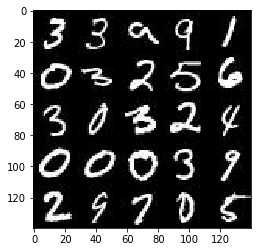

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

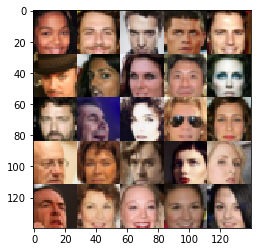

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input_images = tf.placeholder(tf.float32, shape = (None, image_width, image_height, image_channels), name='real_input_images')
    z_inputs = tf.placeholder(tf.float32, shape = (None, z_dim), name='z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return real_input_images, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.2
    
    with tf.variable_scope("discriminator", reuse = reuse):
        #Input layer is 28x28x3
        #print('1')
        #print(images)
        x1 = tf.layers.conv2d(images,128, 5, strides=2, padding ="same")
        #x1 = tf.layers.conv2d(images,64, 5, strides=2, padding ="same")
        #print('2')
        #print(x1)
        relu1 = tf.maximum(alpha * x1, x1)
        #print('3')
        #print(relu1)
        # 28x28x3 -> 14x14x128
        
        x2 = tf.layers.conv2d(relu1,256, 5, strides=2, padding = "same")
        #x2 = tf.layers.conv2d(relu1,128, 5, strides=2, padding = "same")
        bn2 = tf.layers.batch_normalization(x2, training = True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        #print('4')
        #print(relu2)
        # 14x14x128 -> 7x7x256
    
        x3 = tf.layers.conv2d(relu2, 512, 5, strides = 1, padding = "same")
        #x3 = tf.layers.conv2d(relu2, 256, 5, strides = 2, padding = "same")
        bn3 = tf.layers.batch_normalization(x3, training = True)
        relu3 = tf.maximum(alpha * x3, x3)
        #print('5')
        #print(relu3)
        # 7x7x256 -> 7x7x512
        
        #Flatten
        flat = tf.reshape(relu3,(-1, 7 * 7 * 512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        #print(flat)
        # 7x7x512 -> 1x25088

    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    reuse = not is_train
    alpha=0.2
    with tf.variable_scope('generator', reuse = reuse):
        
        #Input layer is z_dim
        #Fully connected layer
        #print('1')
        #print(z)
        x1 = tf.layers.dense(z,  7 * 7 * 512)
        #print('2')
        #print(x1)
        # z_dim x 25088
        
        #Reshape the fully connected layer to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(alpha*x1, x1)
        #print('3')
        #print(x1)
        # 1x25088 -> 7x7x512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides = 2, padding = 'same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha*x2, x2)
        #print('4')
        #print(x2)
        # 7x7x512 -> 14x14x256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #print('5')
        #print(x3)
        # 14x14x256 -> 28x28x128
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        #print('6')
        #print(logits)
        # 28x28x128 -> 28x28x5
        
        out = tf.tanh(logits)
            
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    #smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse = True)
    
    
    d_loss_real = tf.reduce_mean(
        #tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real,labels = tf.ones_like(d_model_real) * (1 - smooth)))
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real,labels = tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    #Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    #Optimize
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    if(data_image_mode == 'RGB'):
        image_channels = 3
    else:
        image_channels = 1
        
    image_width = data_shape[1]
    image_height = data_shape[2]
    
    input_real, input_z, lr = model_inputs(image_width,
                                           image_height,
                                           image_channels,
                                           z_dim)
    
    d_loss,g_loss = model_loss(input_real, input_z, image_channels)
    
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    batch_num = 0
    losses = []
    samples = []
    
    g_vars = [var for var in tf.trainable_variables() if var.name.startswith('generator')]
    saver = tf.train.Saver(var_list=g_vars)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_num += 1
                batch_images *= 2.0
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                
                if batch_num % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if batch_num % 100 == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                
            
            losses.append((train_loss_d, train_loss_g))

            
            sample_z = np.random.uniform(-1, 1, size=(16, z_dim))
            gen_samples = sess.run(
                           generator(input_z, image_channels, is_train=False),
                           feed_dict={input_z: sample_z})
            samples.append(gen_samples) 
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.0189... Generator Loss: 4.1982
Epoch 1/2... Discriminator Loss: 0.0000... Generator Loss: 19.9022
Epoch 1/2... Discriminator Loss: 0.0184... Generator Loss: 6.9382
Epoch 1/2... Discriminator Loss: 0.0021... Generator Loss: 8.0177
Epoch 1/2... Discriminator Loss: 0.7736... Generator Loss: 1.4880
Epoch 1/2... Discriminator Loss: 0.1463... Generator Loss: 3.2581
Epoch 1/2... Discriminator Loss: 0.0916... Generator Loss: 6.2843
Epoch 1/2... Discriminator Loss: 0.0419... Generator Loss: 3.5438
Epoch 1/2... Discriminator Loss: 0.0245... Generator Loss: 5.4418
Epoch 1/2... Discriminator Loss: 0.0135... Generator Loss: 5.2216


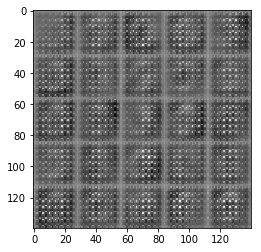

Epoch 1/2... Discriminator Loss: 0.0026... Generator Loss: 6.1879
Epoch 1/2... Discriminator Loss: 0.0029... Generator Loss: 5.9158
Epoch 1/2... Discriminator Loss: 1.5575... Generator Loss: 0.5810
Epoch 1/2... Discriminator Loss: 1.1700... Generator Loss: 1.3276
Epoch 1/2... Discriminator Loss: 0.3451... Generator Loss: 2.2174
Epoch 1/2... Discriminator Loss: 0.1904... Generator Loss: 2.4589
Epoch 1/2... Discriminator Loss: 0.0329... Generator Loss: 4.5828
Epoch 1/2... Discriminator Loss: 0.0328... Generator Loss: 4.0241
Epoch 1/2... Discriminator Loss: 1.0966... Generator Loss: 2.1926
Epoch 1/2... Discriminator Loss: 0.8184... Generator Loss: 1.0314


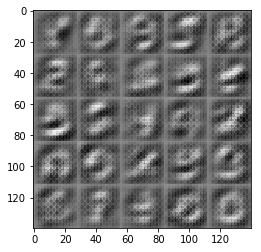

Epoch 1/2... Discriminator Loss: 1.1343... Generator Loss: 0.5624
Epoch 1/2... Discriminator Loss: 1.0468... Generator Loss: 0.9457
Epoch 1/2... Discriminator Loss: 0.9477... Generator Loss: 0.9870
Epoch 1/2... Discriminator Loss: 1.0344... Generator Loss: 0.9348
Epoch 1/2... Discriminator Loss: 1.4295... Generator Loss: 3.2571
Epoch 1/2... Discriminator Loss: 1.0503... Generator Loss: 1.0433
Epoch 1/2... Discriminator Loss: 0.7834... Generator Loss: 2.2752
Epoch 1/2... Discriminator Loss: 1.0613... Generator Loss: 1.5717
Epoch 1/2... Discriminator Loss: 1.1691... Generator Loss: 2.0036
Epoch 1/2... Discriminator Loss: 0.8101... Generator Loss: 1.5266


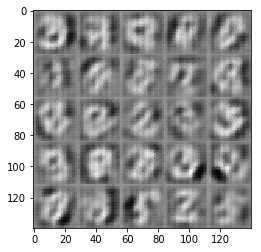

Epoch 1/2... Discriminator Loss: 1.2648... Generator Loss: 0.6128
Epoch 1/2... Discriminator Loss: 1.2755... Generator Loss: 0.4302
Epoch 1/2... Discriminator Loss: 0.9974... Generator Loss: 0.8817
Epoch 1/2... Discriminator Loss: 1.0689... Generator Loss: 1.2451
Epoch 1/2... Discriminator Loss: 1.1340... Generator Loss: 0.7029
Epoch 1/2... Discriminator Loss: 1.1392... Generator Loss: 0.5420
Epoch 1/2... Discriminator Loss: 1.0758... Generator Loss: 0.8299
Epoch 1/2... Discriminator Loss: 1.0716... Generator Loss: 0.7989
Epoch 1/2... Discriminator Loss: 1.0182... Generator Loss: 1.0182
Epoch 1/2... Discriminator Loss: 1.1011... Generator Loss: 2.2576


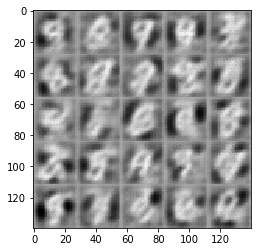

Epoch 1/2... Discriminator Loss: 0.9283... Generator Loss: 1.8816
Epoch 1/2... Discriminator Loss: 1.1509... Generator Loss: 0.6545
Epoch 1/2... Discriminator Loss: 0.9618... Generator Loss: 1.2487
Epoch 1/2... Discriminator Loss: 0.9195... Generator Loss: 2.0464
Epoch 1/2... Discriminator Loss: 0.9501... Generator Loss: 1.3245
Epoch 1/2... Discriminator Loss: 0.9625... Generator Loss: 1.4806
Epoch 1/2... Discriminator Loss: 1.1483... Generator Loss: 0.5741
Epoch 1/2... Discriminator Loss: 1.3011... Generator Loss: 0.5112
Epoch 1/2... Discriminator Loss: 0.8111... Generator Loss: 1.2107
Epoch 1/2... Discriminator Loss: 0.9949... Generator Loss: 0.7702


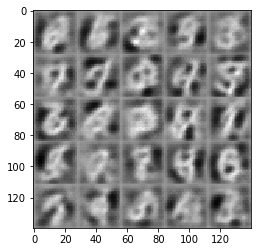

Epoch 1/2... Discriminator Loss: 1.3010... Generator Loss: 0.4689
Epoch 1/2... Discriminator Loss: 0.8970... Generator Loss: 1.0738
Epoch 1/2... Discriminator Loss: 1.1059... Generator Loss: 0.5918
Epoch 1/2... Discriminator Loss: 0.9213... Generator Loss: 1.2653
Epoch 1/2... Discriminator Loss: 1.0935... Generator Loss: 0.9120
Epoch 1/2... Discriminator Loss: 1.0540... Generator Loss: 1.8305
Epoch 1/2... Discriminator Loss: 1.3111... Generator Loss: 0.4677
Epoch 1/2... Discriminator Loss: 0.9732... Generator Loss: 0.9157
Epoch 1/2... Discriminator Loss: 1.4327... Generator Loss: 0.3966
Epoch 1/2... Discriminator Loss: 0.9673... Generator Loss: 1.0180


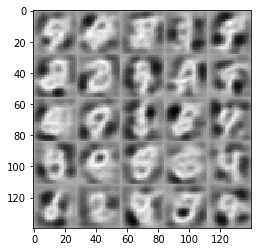

Epoch 1/2... Discriminator Loss: 1.0142... Generator Loss: 2.1109
Epoch 1/2... Discriminator Loss: 1.2609... Generator Loss: 0.4635
Epoch 1/2... Discriminator Loss: 0.9583... Generator Loss: 0.8423
Epoch 1/2... Discriminator Loss: 0.8451... Generator Loss: 1.0462
Epoch 1/2... Discriminator Loss: 0.9450... Generator Loss: 1.4506
Epoch 1/2... Discriminator Loss: 0.9597... Generator Loss: 1.0249
Epoch 1/2... Discriminator Loss: 0.8713... Generator Loss: 1.0210
Epoch 1/2... Discriminator Loss: 0.9106... Generator Loss: 1.5358
Epoch 1/2... Discriminator Loss: 1.0332... Generator Loss: 0.7630
Epoch 1/2... Discriminator Loss: 1.2298... Generator Loss: 0.5526


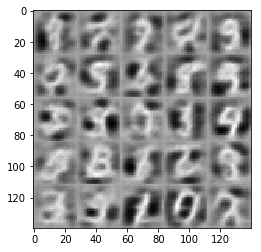

Epoch 1/2... Discriminator Loss: 1.1883... Generator Loss: 0.5685
Epoch 1/2... Discriminator Loss: 1.0006... Generator Loss: 0.6915
Epoch 1/2... Discriminator Loss: 1.2850... Generator Loss: 0.4471
Epoch 1/2... Discriminator Loss: 1.2355... Generator Loss: 0.5036
Epoch 1/2... Discriminator Loss: 1.0641... Generator Loss: 0.9597
Epoch 1/2... Discriminator Loss: 0.8394... Generator Loss: 2.0465
Epoch 1/2... Discriminator Loss: 1.1463... Generator Loss: 1.9036
Epoch 1/2... Discriminator Loss: 1.2170... Generator Loss: 1.9206
Epoch 1/2... Discriminator Loss: 1.2562... Generator Loss: 0.5131
Epoch 1/2... Discriminator Loss: 1.1617... Generator Loss: 0.6486


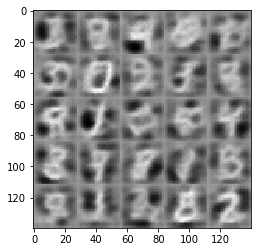

Epoch 1/2... Discriminator Loss: 0.9445... Generator Loss: 0.8504
Epoch 1/2... Discriminator Loss: 0.8521... Generator Loss: 1.5781
Epoch 1/2... Discriminator Loss: 0.9255... Generator Loss: 1.0588
Epoch 1/2... Discriminator Loss: 0.8430... Generator Loss: 1.0056
Epoch 1/2... Discriminator Loss: 1.0933... Generator Loss: 0.7946
Epoch 1/2... Discriminator Loss: 1.0629... Generator Loss: 0.6653
Epoch 1/2... Discriminator Loss: 1.2962... Generator Loss: 2.4560
Epoch 1/2... Discriminator Loss: 0.9141... Generator Loss: 0.8132
Epoch 1/2... Discriminator Loss: 0.8137... Generator Loss: 1.8386
Epoch 1/2... Discriminator Loss: 1.3730... Generator Loss: 0.5044


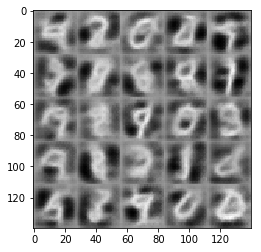

Epoch 1/2... Discriminator Loss: 1.0409... Generator Loss: 0.6728
Epoch 1/2... Discriminator Loss: 0.9310... Generator Loss: 0.8091
Epoch 1/2... Discriminator Loss: 0.9844... Generator Loss: 1.3772
Epoch 1/2... Discriminator Loss: 0.9273... Generator Loss: 0.9150
Epoch 1/2... Discriminator Loss: 1.0706... Generator Loss: 0.7048
Epoch 1/2... Discriminator Loss: 0.9533... Generator Loss: 0.7974
Epoch 1/2... Discriminator Loss: 0.9038... Generator Loss: 1.6769
Epoch 1/2... Discriminator Loss: 0.9399... Generator Loss: 0.9397
Epoch 1/2... Discriminator Loss: 1.2089... Generator Loss: 0.6526
Epoch 1/2... Discriminator Loss: 1.1175... Generator Loss: 2.3660


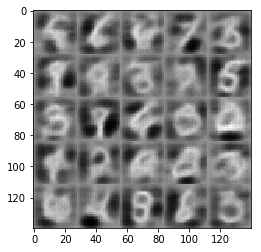

Epoch 1/2... Discriminator Loss: 1.1308... Generator Loss: 0.8246
Epoch 1/2... Discriminator Loss: 0.9408... Generator Loss: 1.6374
Epoch 1/2... Discriminator Loss: 1.0683... Generator Loss: 0.8679
Epoch 1/2... Discriminator Loss: 0.6517... Generator Loss: 1.2930
Epoch 1/2... Discriminator Loss: 1.3500... Generator Loss: 0.4450
Epoch 1/2... Discriminator Loss: 0.8099... Generator Loss: 1.2829
Epoch 1/2... Discriminator Loss: 1.1480... Generator Loss: 0.5981
Epoch 1/2... Discriminator Loss: 0.9351... Generator Loss: 0.9134
Epoch 1/2... Discriminator Loss: 0.9402... Generator Loss: 1.0866
Epoch 1/2... Discriminator Loss: 0.8010... Generator Loss: 1.7919


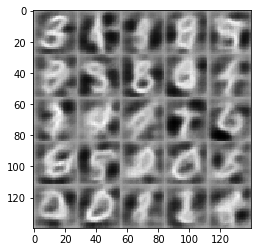

Epoch 1/2... Discriminator Loss: 0.9556... Generator Loss: 1.0363
Epoch 1/2... Discriminator Loss: 1.0287... Generator Loss: 2.3225
Epoch 1/2... Discriminator Loss: 1.0137... Generator Loss: 1.3500
Epoch 1/2... Discriminator Loss: 1.0172... Generator Loss: 1.8554
Epoch 1/2... Discriminator Loss: 1.2403... Generator Loss: 0.7129
Epoch 1/2... Discriminator Loss: 0.9160... Generator Loss: 0.9749
Epoch 1/2... Discriminator Loss: 0.7878... Generator Loss: 1.0843
Epoch 1/2... Discriminator Loss: 1.0955... Generator Loss: 0.7707
Epoch 1/2... Discriminator Loss: 1.2649... Generator Loss: 2.6743
Epoch 1/2... Discriminator Loss: 0.8542... Generator Loss: 1.3406


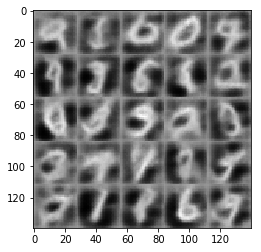

Epoch 1/2... Discriminator Loss: 0.8401... Generator Loss: 1.3110
Epoch 1/2... Discriminator Loss: 0.7890... Generator Loss: 1.0507
Epoch 1/2... Discriminator Loss: 1.6055... Generator Loss: 0.3512
Epoch 1/2... Discriminator Loss: 1.3155... Generator Loss: 0.4456
Epoch 1/2... Discriminator Loss: 0.9086... Generator Loss: 1.3187
Epoch 1/2... Discriminator Loss: 1.0165... Generator Loss: 0.7654
Epoch 1/2... Discriminator Loss: 0.7731... Generator Loss: 1.0130
Epoch 1/2... Discriminator Loss: 0.9225... Generator Loss: 0.7949
Epoch 1/2... Discriminator Loss: 0.8667... Generator Loss: 1.3186
Epoch 1/2... Discriminator Loss: 0.9294... Generator Loss: 1.2199


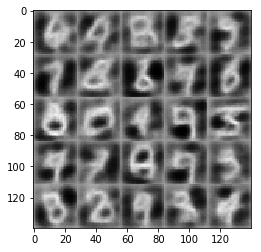

Epoch 1/2... Discriminator Loss: 0.8883... Generator Loss: 0.9148
Epoch 1/2... Discriminator Loss: 1.2146... Generator Loss: 0.5480
Epoch 1/2... Discriminator Loss: 1.7854... Generator Loss: 0.5108
Epoch 1/2... Discriminator Loss: 0.9812... Generator Loss: 1.4929
Epoch 1/2... Discriminator Loss: 1.0220... Generator Loss: 0.7990
Epoch 1/2... Discriminator Loss: 0.9178... Generator Loss: 1.0177
Epoch 1/2... Discriminator Loss: 1.0369... Generator Loss: 0.6342
Epoch 1/2... Discriminator Loss: 0.8213... Generator Loss: 1.0328
Epoch 1/2... Discriminator Loss: 1.0419... Generator Loss: 0.7773
Epoch 1/2... Discriminator Loss: 0.7602... Generator Loss: 1.2505


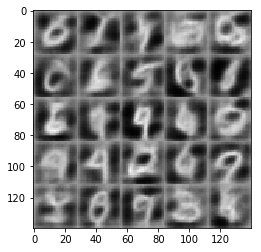

Epoch 1/2... Discriminator Loss: 0.9277... Generator Loss: 1.2917
Epoch 1/2... Discriminator Loss: 0.7176... Generator Loss: 1.6571
Epoch 1/2... Discriminator Loss: 0.8107... Generator Loss: 1.6682
Epoch 1/2... Discriminator Loss: 1.4703... Generator Loss: 0.3677
Epoch 1/2... Discriminator Loss: 1.0872... Generator Loss: 0.7585
Epoch 1/2... Discriminator Loss: 1.1321... Generator Loss: 2.8192
Epoch 1/2... Discriminator Loss: 0.7770... Generator Loss: 1.2036
Epoch 1/2... Discriminator Loss: 1.1457... Generator Loss: 0.6359
Epoch 1/2... Discriminator Loss: 1.8608... Generator Loss: 0.2572
Epoch 1/2... Discriminator Loss: 0.8417... Generator Loss: 0.8991


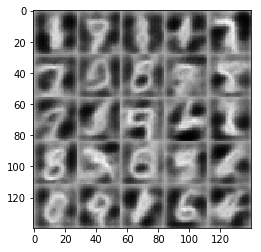

Epoch 1/2... Discriminator Loss: 0.8711... Generator Loss: 0.9560
Epoch 1/2... Discriminator Loss: 1.2177... Generator Loss: 2.6842
Epoch 1/2... Discriminator Loss: 1.0414... Generator Loss: 1.5119
Epoch 1/2... Discriminator Loss: 0.9432... Generator Loss: 0.9508
Epoch 1/2... Discriminator Loss: 0.8695... Generator Loss: 0.9910
Epoch 1/2... Discriminator Loss: 1.2053... Generator Loss: 0.5349
Epoch 1/2... Discriminator Loss: 0.9395... Generator Loss: 0.9157
Epoch 1/2... Discriminator Loss: 1.0159... Generator Loss: 0.7541
Epoch 1/2... Discriminator Loss: 0.9657... Generator Loss: 0.8773
Epoch 1/2... Discriminator Loss: 1.2264... Generator Loss: 0.6018


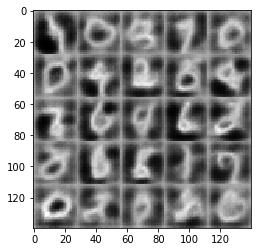

Epoch 1/2... Discriminator Loss: 0.6646... Generator Loss: 1.3231
Epoch 1/2... Discriminator Loss: 1.5592... Generator Loss: 3.6366
Epoch 1/2... Discriminator Loss: 1.0286... Generator Loss: 0.7507
Epoch 1/2... Discriminator Loss: 0.9347... Generator Loss: 0.9398
Epoch 1/2... Discriminator Loss: 0.7448... Generator Loss: 1.4679
Epoch 1/2... Discriminator Loss: 0.7941... Generator Loss: 1.4031
Epoch 1/2... Discriminator Loss: 0.6992... Generator Loss: 1.3882
Epoch 1/2... Discriminator Loss: 0.8481... Generator Loss: 1.4172
Epoch 1/2... Discriminator Loss: 0.7804... Generator Loss: 1.4069
Epoch 1/2... Discriminator Loss: 0.8858... Generator Loss: 0.9849


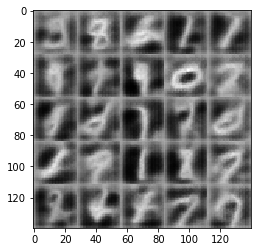

Epoch 1/2... Discriminator Loss: 0.7288... Generator Loss: 1.1786
Epoch 1/2... Discriminator Loss: 1.5193... Generator Loss: 0.3614
Epoch 1/2... Discriminator Loss: 1.0005... Generator Loss: 0.7563
Epoch 1/2... Discriminator Loss: 1.1841... Generator Loss: 0.6294
Epoch 1/2... Discriminator Loss: 0.7455... Generator Loss: 1.4149
Epoch 1/2... Discriminator Loss: 0.8506... Generator Loss: 1.1784
Epoch 1/2... Discriminator Loss: 0.9426... Generator Loss: 0.8088
Epoch 1/2... Discriminator Loss: 0.9591... Generator Loss: 0.9211
Epoch 1/2... Discriminator Loss: 0.8378... Generator Loss: 1.8257
Epoch 1/2... Discriminator Loss: 0.7105... Generator Loss: 1.0721


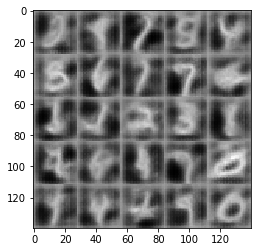

Epoch 1/2... Discriminator Loss: 1.2226... Generator Loss: 2.3325
Epoch 1/2... Discriminator Loss: 1.7112... Generator Loss: 0.3153
Epoch 1/2... Discriminator Loss: 0.7484... Generator Loss: 1.3323
Epoch 1/2... Discriminator Loss: 0.8928... Generator Loss: 1.0075
Epoch 1/2... Discriminator Loss: 0.6245... Generator Loss: 1.3636
Epoch 1/2... Discriminator Loss: 0.8675... Generator Loss: 0.9649
Epoch 1/2... Discriminator Loss: 1.0213... Generator Loss: 0.8059
Epoch 2/2... Discriminator Loss: 0.6518... Generator Loss: 1.4337
Epoch 2/2... Discriminator Loss: 0.8642... Generator Loss: 1.2725
Epoch 2/2... Discriminator Loss: 1.0485... Generator Loss: 1.3777


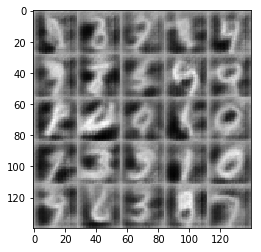

Epoch 2/2... Discriminator Loss: 0.7639... Generator Loss: 1.3376
Epoch 2/2... Discriminator Loss: 0.6111... Generator Loss: 1.3920
Epoch 2/2... Discriminator Loss: 0.8669... Generator Loss: 0.8518
Epoch 2/2... Discriminator Loss: 0.9245... Generator Loss: 0.8759
Epoch 2/2... Discriminator Loss: 1.0192... Generator Loss: 1.7544
Epoch 2/2... Discriminator Loss: 0.7906... Generator Loss: 1.0213
Epoch 2/2... Discriminator Loss: 2.6949... Generator Loss: 0.1634
Epoch 2/2... Discriminator Loss: 0.6980... Generator Loss: 1.3696
Epoch 2/2... Discriminator Loss: 0.8420... Generator Loss: 1.0474
Epoch 2/2... Discriminator Loss: 0.8196... Generator Loss: 1.1187


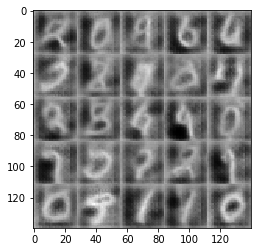

Epoch 2/2... Discriminator Loss: 0.8834... Generator Loss: 1.2483
Epoch 2/2... Discriminator Loss: 0.8502... Generator Loss: 1.3987
Epoch 2/2... Discriminator Loss: 0.7854... Generator Loss: 1.3056
Epoch 2/2... Discriminator Loss: 0.8359... Generator Loss: 1.0944
Epoch 2/2... Discriminator Loss: 1.3574... Generator Loss: 0.4762
Epoch 2/2... Discriminator Loss: 1.1049... Generator Loss: 0.8493
Epoch 2/2... Discriminator Loss: 1.2432... Generator Loss: 0.5255
Epoch 2/2... Discriminator Loss: 1.0263... Generator Loss: 0.8642
Epoch 2/2... Discriminator Loss: 1.1579... Generator Loss: 0.7130
Epoch 2/2... Discriminator Loss: 0.9262... Generator Loss: 0.7838


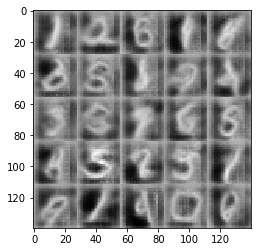

Epoch 2/2... Discriminator Loss: 0.7638... Generator Loss: 1.1682
Epoch 2/2... Discriminator Loss: 1.0125... Generator Loss: 0.8529
Epoch 2/2... Discriminator Loss: 1.2025... Generator Loss: 1.2819
Epoch 2/2... Discriminator Loss: 0.8272... Generator Loss: 1.1459
Epoch 2/2... Discriminator Loss: 0.8214... Generator Loss: 1.1669
Epoch 2/2... Discriminator Loss: 0.7488... Generator Loss: 1.0675
Epoch 2/2... Discriminator Loss: 0.9428... Generator Loss: 0.9730
Epoch 2/2... Discriminator Loss: 0.7717... Generator Loss: 1.4728
Epoch 2/2... Discriminator Loss: 1.0257... Generator Loss: 1.2341
Epoch 2/2... Discriminator Loss: 0.9721... Generator Loss: 0.8035


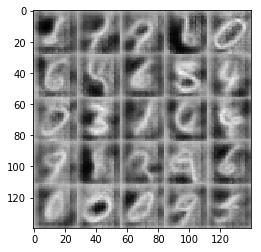

Epoch 2/2... Discriminator Loss: 0.8456... Generator Loss: 1.0833
Epoch 2/2... Discriminator Loss: 0.8426... Generator Loss: 1.0266
Epoch 2/2... Discriminator Loss: 1.1436... Generator Loss: 0.6001
Epoch 2/2... Discriminator Loss: 0.7587... Generator Loss: 1.4554
Epoch 2/2... Discriminator Loss: 1.4589... Generator Loss: 0.3420
Epoch 2/2... Discriminator Loss: 0.8694... Generator Loss: 0.8730
Epoch 2/2... Discriminator Loss: 0.6394... Generator Loss: 1.3831
Epoch 2/2... Discriminator Loss: 0.6978... Generator Loss: 1.5626
Epoch 2/2... Discriminator Loss: 0.7734... Generator Loss: 1.1282
Epoch 2/2... Discriminator Loss: 0.7527... Generator Loss: 1.7895


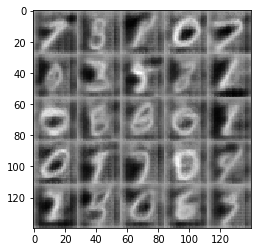

Epoch 2/2... Discriminator Loss: 0.7769... Generator Loss: 0.9842
Epoch 2/2... Discriminator Loss: 1.4419... Generator Loss: 0.5040
Epoch 2/2... Discriminator Loss: 1.0415... Generator Loss: 0.7418
Epoch 2/2... Discriminator Loss: 0.8027... Generator Loss: 1.7296
Epoch 2/2... Discriminator Loss: 0.9839... Generator Loss: 2.1872
Epoch 2/2... Discriminator Loss: 0.9531... Generator Loss: 1.3997
Epoch 2/2... Discriminator Loss: 0.8848... Generator Loss: 1.0951
Epoch 2/2... Discriminator Loss: 0.6729... Generator Loss: 1.7097
Epoch 2/2... Discriminator Loss: 0.8602... Generator Loss: 0.8625
Epoch 2/2... Discriminator Loss: 0.8369... Generator Loss: 1.9532


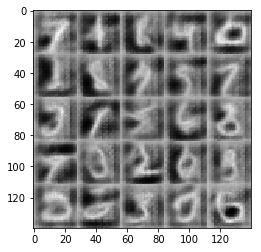

Epoch 2/2... Discriminator Loss: 0.6303... Generator Loss: 1.9982
Epoch 2/2... Discriminator Loss: 1.0409... Generator Loss: 2.2570
Epoch 2/2... Discriminator Loss: 0.9306... Generator Loss: 1.4743
Epoch 2/2... Discriminator Loss: 0.9999... Generator Loss: 2.0581
Epoch 2/2... Discriminator Loss: 0.8011... Generator Loss: 1.1910
Epoch 2/2... Discriminator Loss: 0.7509... Generator Loss: 1.2237
Epoch 2/2... Discriminator Loss: 1.2174... Generator Loss: 2.8073
Epoch 2/2... Discriminator Loss: 1.1322... Generator Loss: 0.7001
Epoch 2/2... Discriminator Loss: 0.8754... Generator Loss: 2.0499
Epoch 2/2... Discriminator Loss: 1.1785... Generator Loss: 0.6097


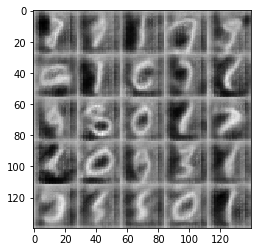

Epoch 2/2... Discriminator Loss: 0.8320... Generator Loss: 0.9648
Epoch 2/2... Discriminator Loss: 0.8594... Generator Loss: 1.0929
Epoch 2/2... Discriminator Loss: 0.8609... Generator Loss: 0.8773
Epoch 2/2... Discriminator Loss: 0.6055... Generator Loss: 1.9982
Epoch 2/2... Discriminator Loss: 0.7338... Generator Loss: 1.3443
Epoch 2/2... Discriminator Loss: 1.1349... Generator Loss: 0.6926
Epoch 2/2... Discriminator Loss: 0.7869... Generator Loss: 1.4071
Epoch 2/2... Discriminator Loss: 1.0545... Generator Loss: 0.7993
Epoch 2/2... Discriminator Loss: 0.8865... Generator Loss: 0.8592
Epoch 2/2... Discriminator Loss: 1.0467... Generator Loss: 0.9178


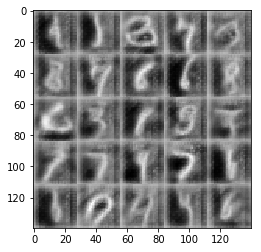

Epoch 2/2... Discriminator Loss: 1.0154... Generator Loss: 0.7178
Epoch 2/2... Discriminator Loss: 0.7096... Generator Loss: 1.2917
Epoch 2/2... Discriminator Loss: 0.7041... Generator Loss: 1.4829
Epoch 2/2... Discriminator Loss: 1.2561... Generator Loss: 0.6166
Epoch 2/2... Discriminator Loss: 1.2228... Generator Loss: 0.5837
Epoch 2/2... Discriminator Loss: 0.9551... Generator Loss: 1.0767
Epoch 2/2... Discriminator Loss: 0.6696... Generator Loss: 1.3591
Epoch 2/2... Discriminator Loss: 0.7130... Generator Loss: 1.3995
Epoch 2/2... Discriminator Loss: 0.8420... Generator Loss: 1.0554
Epoch 2/2... Discriminator Loss: 0.6999... Generator Loss: 1.1387


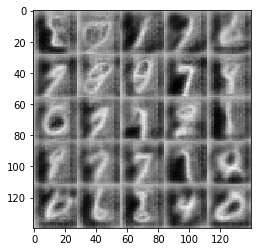

Epoch 2/2... Discriminator Loss: 1.0055... Generator Loss: 0.7663
Epoch 2/2... Discriminator Loss: 1.2248... Generator Loss: 2.1863
Epoch 2/2... Discriminator Loss: 0.9208... Generator Loss: 1.0999
Epoch 2/2... Discriminator Loss: 0.7699... Generator Loss: 1.0312
Epoch 2/2... Discriminator Loss: 0.7738... Generator Loss: 1.0323
Epoch 2/2... Discriminator Loss: 0.8053... Generator Loss: 1.3079
Epoch 2/2... Discriminator Loss: 0.9222... Generator Loss: 0.8893
Epoch 2/2... Discriminator Loss: 0.8049... Generator Loss: 1.5311
Epoch 2/2... Discriminator Loss: 0.9564... Generator Loss: 0.8601
Epoch 2/2... Discriminator Loss: 1.2369... Generator Loss: 0.5519


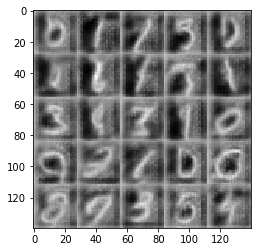

Epoch 2/2... Discriminator Loss: 1.2160... Generator Loss: 0.6209
Epoch 2/2... Discriminator Loss: 0.5274... Generator Loss: 1.8594
Epoch 2/2... Discriminator Loss: 0.6382... Generator Loss: 2.1805
Epoch 2/2... Discriminator Loss: 0.7743... Generator Loss: 1.1240
Epoch 2/2... Discriminator Loss: 1.5283... Generator Loss: 0.5939
Epoch 2/2... Discriminator Loss: 1.1775... Generator Loss: 0.5794
Epoch 2/2... Discriminator Loss: 0.7752... Generator Loss: 1.1514
Epoch 2/2... Discriminator Loss: 0.7719... Generator Loss: 1.5639
Epoch 2/2... Discriminator Loss: 0.9997... Generator Loss: 0.9447
Epoch 2/2... Discriminator Loss: 0.7752... Generator Loss: 1.6659


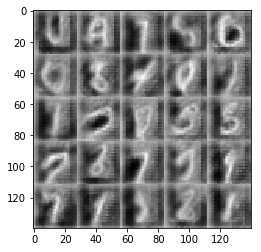

Epoch 2/2... Discriminator Loss: 0.6692... Generator Loss: 1.6802
Epoch 2/2... Discriminator Loss: 1.1540... Generator Loss: 0.5945
Epoch 2/2... Discriminator Loss: 0.9815... Generator Loss: 0.7453
Epoch 2/2... Discriminator Loss: 0.7089... Generator Loss: 1.2261
Epoch 2/2... Discriminator Loss: 0.7337... Generator Loss: 1.0241
Epoch 2/2... Discriminator Loss: 0.6979... Generator Loss: 1.6009
Epoch 2/2... Discriminator Loss: 0.8427... Generator Loss: 0.9189
Epoch 2/2... Discriminator Loss: 0.7813... Generator Loss: 1.0628
Epoch 2/2... Discriminator Loss: 0.7406... Generator Loss: 1.0655
Epoch 2/2... Discriminator Loss: 0.7566... Generator Loss: 1.4435


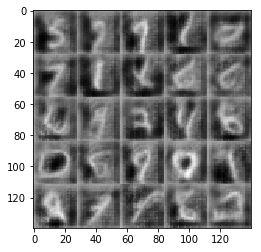

Epoch 2/2... Discriminator Loss: 0.9335... Generator Loss: 0.7943
Epoch 2/2... Discriminator Loss: 0.7926... Generator Loss: 1.2450
Epoch 2/2... Discriminator Loss: 0.6611... Generator Loss: 1.4816
Epoch 2/2... Discriminator Loss: 0.9059... Generator Loss: 0.8364
Epoch 2/2... Discriminator Loss: 0.5358... Generator Loss: 1.6702
Epoch 2/2... Discriminator Loss: 0.9880... Generator Loss: 0.9261
Epoch 2/2... Discriminator Loss: 0.7959... Generator Loss: 0.9059
Epoch 2/2... Discriminator Loss: 1.0713... Generator Loss: 2.0387
Epoch 2/2... Discriminator Loss: 0.6965... Generator Loss: 1.4729
Epoch 2/2... Discriminator Loss: 0.9036... Generator Loss: 1.7363


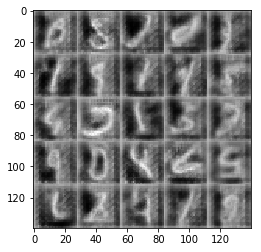

Epoch 2/2... Discriminator Loss: 0.7727... Generator Loss: 0.9410
Epoch 2/2... Discriminator Loss: 0.6116... Generator Loss: 1.9033
Epoch 2/2... Discriminator Loss: 0.6962... Generator Loss: 1.3383
Epoch 2/2... Discriminator Loss: 0.8813... Generator Loss: 0.7590
Epoch 2/2... Discriminator Loss: 1.1354... Generator Loss: 0.8058
Epoch 2/2... Discriminator Loss: 0.8627... Generator Loss: 0.7911
Epoch 2/2... Discriminator Loss: 1.1315... Generator Loss: 1.3788
Epoch 2/2... Discriminator Loss: 1.1030... Generator Loss: 0.7611
Epoch 2/2... Discriminator Loss: 1.0626... Generator Loss: 0.7617
Epoch 2/2... Discriminator Loss: 0.9490... Generator Loss: 0.7735


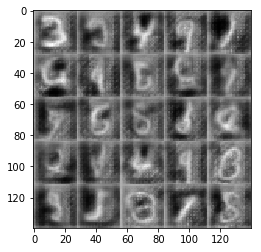

Epoch 2/2... Discriminator Loss: 0.8449... Generator Loss: 1.0533
Epoch 2/2... Discriminator Loss: 1.0308... Generator Loss: 0.7623
Epoch 2/2... Discriminator Loss: 0.6462... Generator Loss: 1.7317
Epoch 2/2... Discriminator Loss: 0.7649... Generator Loss: 1.2198
Epoch 2/2... Discriminator Loss: 0.6325... Generator Loss: 1.7091
Epoch 2/2... Discriminator Loss: 0.6063... Generator Loss: 1.6875
Epoch 2/2... Discriminator Loss: 0.7558... Generator Loss: 1.1865
Epoch 2/2... Discriminator Loss: 0.8793... Generator Loss: 2.4032
Epoch 2/2... Discriminator Loss: 0.8662... Generator Loss: 1.0836
Epoch 2/2... Discriminator Loss: 0.7180... Generator Loss: 1.5557


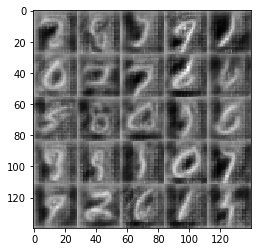

Epoch 2/2... Discriminator Loss: 0.8261... Generator Loss: 1.1970
Epoch 2/2... Discriminator Loss: 0.5456... Generator Loss: 2.0255
Epoch 2/2... Discriminator Loss: 0.6620... Generator Loss: 1.2451
Epoch 2/2... Discriminator Loss: 0.6494... Generator Loss: 1.2249
Epoch 2/2... Discriminator Loss: 0.9698... Generator Loss: 0.8160
Epoch 2/2... Discriminator Loss: 0.7521... Generator Loss: 1.2288
Epoch 2/2... Discriminator Loss: 1.7033... Generator Loss: 2.5610
Epoch 2/2... Discriminator Loss: 0.8919... Generator Loss: 2.0002
Epoch 2/2... Discriminator Loss: 0.8548... Generator Loss: 0.9943
Epoch 2/2... Discriminator Loss: 0.6198... Generator Loss: 1.2821


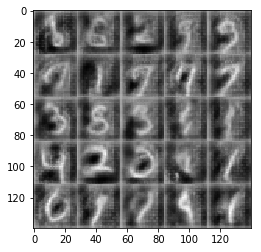

Epoch 2/2... Discriminator Loss: 0.7429... Generator Loss: 1.5731
Epoch 2/2... Discriminator Loss: 1.0450... Generator Loss: 0.8500
Epoch 2/2... Discriminator Loss: 0.8999... Generator Loss: 1.0362
Epoch 2/2... Discriminator Loss: 0.8305... Generator Loss: 1.0474
Epoch 2/2... Discriminator Loss: 0.5359... Generator Loss: 1.7701
Epoch 2/2... Discriminator Loss: 0.7386... Generator Loss: 1.1013
Epoch 2/2... Discriminator Loss: 0.8246... Generator Loss: 1.0180
Epoch 2/2... Discriminator Loss: 0.6749... Generator Loss: 1.5110
Epoch 2/2... Discriminator Loss: 0.8396... Generator Loss: 2.2828
Epoch 2/2... Discriminator Loss: 0.6463... Generator Loss: 1.6176


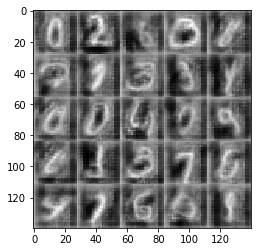

Epoch 2/2... Discriminator Loss: 1.0809... Generator Loss: 0.7571
Epoch 2/2... Discriminator Loss: 0.8723... Generator Loss: 2.5538
Epoch 2/2... Discriminator Loss: 1.2074... Generator Loss: 0.9728
Epoch 2/2... Discriminator Loss: 0.8426... Generator Loss: 1.0199
Epoch 2/2... Discriminator Loss: 0.9135... Generator Loss: 1.0245
Epoch 2/2... Discriminator Loss: 0.8405... Generator Loss: 0.9210
Epoch 2/2... Discriminator Loss: 0.8319... Generator Loss: 1.1713
Epoch 2/2... Discriminator Loss: 0.5553... Generator Loss: 1.6627
Epoch 2/2... Discriminator Loss: 0.8149... Generator Loss: 0.9447
Epoch 2/2... Discriminator Loss: 1.6214... Generator Loss: 1.9012


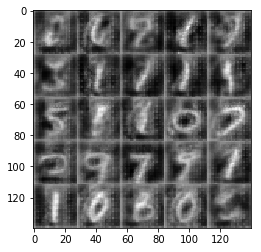

Epoch 2/2... Discriminator Loss: 0.7236... Generator Loss: 1.4501
Epoch 2/2... Discriminator Loss: 0.6180... Generator Loss: 1.7561
Epoch 2/2... Discriminator Loss: 0.7401... Generator Loss: 1.1140
Epoch 2/2... Discriminator Loss: 0.7957... Generator Loss: 1.1664
Epoch 2/2... Discriminator Loss: 0.8832... Generator Loss: 0.9595
Epoch 2/2... Discriminator Loss: 0.7080... Generator Loss: 1.1926
Epoch 2/2... Discriminator Loss: 0.6414... Generator Loss: 2.0790
Epoch 2/2... Discriminator Loss: 0.7124... Generator Loss: 1.9640
Epoch 2/2... Discriminator Loss: 0.8939... Generator Loss: 0.8930
Epoch 2/2... Discriminator Loss: 0.6680... Generator Loss: 1.1998


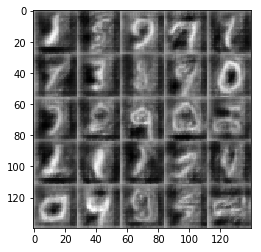

Epoch 2/2... Discriminator Loss: 1.3227... Generator Loss: 0.5666
Epoch 2/2... Discriminator Loss: 0.7097... Generator Loss: 1.4779
Epoch 2/2... Discriminator Loss: 0.7286... Generator Loss: 1.1752
Epoch 2/2... Discriminator Loss: 1.2372... Generator Loss: 0.5201
Epoch 2/2... Discriminator Loss: 0.8515... Generator Loss: 0.9126


In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.0263... Generator Loss: 6.0033
Epoch 1/1... Discriminator Loss: 0.0390... Generator Loss: 3.7313
Epoch 1/1... Discriminator Loss: 1.1246... Generator Loss: 13.2658
Epoch 1/1... Discriminator Loss: 0.0182... Generator Loss: 18.3990
Epoch 1/1... Discriminator Loss: 1.8708... Generator Loss: 21.5835
Epoch 1/1... Discriminator Loss: 0.3858... Generator Loss: 2.0404
Epoch 1/1... Discriminator Loss: 0.2875... Generator Loss: 2.2175
Epoch 1/1... Discriminator Loss: 0.4738... Generator Loss: 3.7896
Epoch 1/1... Discriminator Loss: 0.5599... Generator Loss: 1.6594
Epoch 1/1... Discriminator Loss: 0.4227... Generator Loss: 1.6855


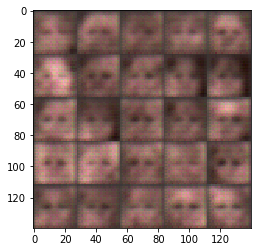

Epoch 1/1... Discriminator Loss: 0.3722... Generator Loss: 1.7530
Epoch 1/1... Discriminator Loss: 2.3096... Generator Loss: 0.2430
Epoch 1/1... Discriminator Loss: 1.4614... Generator Loss: 0.5376
Epoch 1/1... Discriminator Loss: 0.2094... Generator Loss: 2.4596
Epoch 1/1... Discriminator Loss: 0.3071... Generator Loss: 1.6898
Epoch 1/1... Discriminator Loss: 0.0920... Generator Loss: 5.7086
Epoch 1/1... Discriminator Loss: 0.2731... Generator Loss: 2.7184
Epoch 1/1... Discriminator Loss: 0.4243... Generator Loss: 2.0688
Epoch 1/1... Discriminator Loss: 0.9574... Generator Loss: 4.8008
Epoch 1/1... Discriminator Loss: 1.0562... Generator Loss: 0.7332


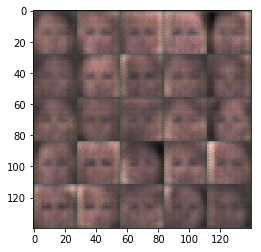

Epoch 1/1... Discriminator Loss: 0.0691... Generator Loss: 4.0055
Epoch 1/1... Discriminator Loss: 0.1989... Generator Loss: 5.9219
Epoch 1/1... Discriminator Loss: 0.1472... Generator Loss: 3.7597
Epoch 1/1... Discriminator Loss: 0.0894... Generator Loss: 6.8421
Epoch 1/1... Discriminator Loss: 0.6084... Generator Loss: 3.5997
Epoch 1/1... Discriminator Loss: 0.8061... Generator Loss: 1.0948
Epoch 1/1... Discriminator Loss: 0.9078... Generator Loss: 1.1540
Epoch 1/1... Discriminator Loss: 1.0282... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.1535... Generator Loss: 7.9963
Epoch 1/1... Discriminator Loss: 0.4868... Generator Loss: 1.3219


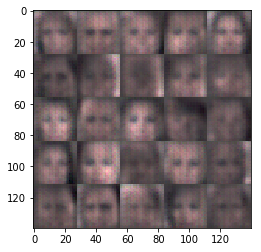

Epoch 1/1... Discriminator Loss: 0.0891... Generator Loss: 3.9035
Epoch 1/1... Discriminator Loss: 0.2839... Generator Loss: 5.2867
Epoch 1/1... Discriminator Loss: 0.6644... Generator Loss: 1.3937
Epoch 1/1... Discriminator Loss: 0.2882... Generator Loss: 4.7847
Epoch 1/1... Discriminator Loss: 0.4942... Generator Loss: 1.3694
Epoch 1/1... Discriminator Loss: 0.5969... Generator Loss: 1.9079
Epoch 1/1... Discriminator Loss: 0.4247... Generator Loss: 8.7980
Epoch 1/1... Discriminator Loss: 1.4130... Generator Loss: 10.2471
Epoch 1/1... Discriminator Loss: 1.3631... Generator Loss: 0.5309
Epoch 1/1... Discriminator Loss: 1.1651... Generator Loss: 0.5282


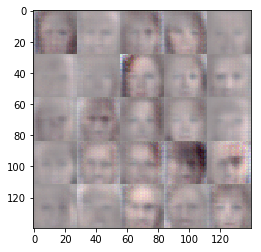

Epoch 1/1... Discriminator Loss: 0.8612... Generator Loss: 0.8096
Epoch 1/1... Discriminator Loss: 1.1693... Generator Loss: 2.4210
Epoch 1/1... Discriminator Loss: 1.5642... Generator Loss: 0.3228
Epoch 1/1... Discriminator Loss: 0.3283... Generator Loss: 2.7346
Epoch 1/1... Discriminator Loss: 0.6900... Generator Loss: 1.0692
Epoch 1/1... Discriminator Loss: 0.4832... Generator Loss: 1.5406
Epoch 1/1... Discriminator Loss: 1.0581... Generator Loss: 3.2148
Epoch 1/1... Discriminator Loss: 0.3224... Generator Loss: 4.4118
Epoch 1/1... Discriminator Loss: 0.3263... Generator Loss: 3.8700
Epoch 1/1... Discriminator Loss: 0.5806... Generator Loss: 1.5657


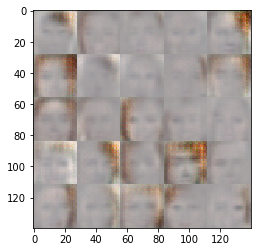

Epoch 1/1... Discriminator Loss: 1.0167... Generator Loss: 4.2009
Epoch 1/1... Discriminator Loss: 0.2595... Generator Loss: 5.8831
Epoch 1/1... Discriminator Loss: 0.2996... Generator Loss: 2.7001
Epoch 1/1... Discriminator Loss: 0.3023... Generator Loss: 2.9020
Epoch 1/1... Discriminator Loss: 0.7171... Generator Loss: 1.1519
Epoch 1/1... Discriminator Loss: 0.9009... Generator Loss: 0.7878
Epoch 1/1... Discriminator Loss: 0.4493... Generator Loss: 1.6580
Epoch 1/1... Discriminator Loss: 0.5693... Generator Loss: 1.5981
Epoch 1/1... Discriminator Loss: 0.6517... Generator Loss: 2.0584
Epoch 1/1... Discriminator Loss: 0.2947... Generator Loss: 3.1236


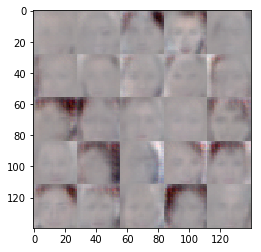

Epoch 1/1... Discriminator Loss: 0.3152... Generator Loss: 2.3108
Epoch 1/1... Discriminator Loss: 0.7591... Generator Loss: 6.0201
Epoch 1/1... Discriminator Loss: 0.2229... Generator Loss: 7.1674
Epoch 1/1... Discriminator Loss: 0.7808... Generator Loss: 1.1655
Epoch 1/1... Discriminator Loss: 0.6862... Generator Loss: 1.5508
Epoch 1/1... Discriminator Loss: 0.3931... Generator Loss: 3.0066
Epoch 1/1... Discriminator Loss: 0.2897... Generator Loss: 2.8784
Epoch 1/1... Discriminator Loss: 0.4998... Generator Loss: 4.9027
Epoch 1/1... Discriminator Loss: 0.7125... Generator Loss: 7.1334
Epoch 1/1... Discriminator Loss: 0.5122... Generator Loss: 1.9571


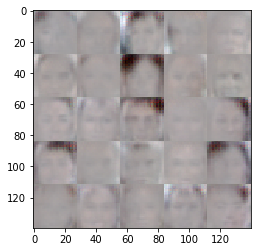

Epoch 1/1... Discriminator Loss: 0.5656... Generator Loss: 3.4430
Epoch 1/1... Discriminator Loss: 0.5209... Generator Loss: 1.5452
Epoch 1/1... Discriminator Loss: 0.2953... Generator Loss: 2.7951
Epoch 1/1... Discriminator Loss: 1.7778... Generator Loss: 0.9003
Epoch 1/1... Discriminator Loss: 0.7416... Generator Loss: 4.8095
Epoch 1/1... Discriminator Loss: 0.3206... Generator Loss: 3.9532
Epoch 1/1... Discriminator Loss: 1.4441... Generator Loss: 5.5067
Epoch 1/1... Discriminator Loss: 0.9015... Generator Loss: 3.2810
Epoch 1/1... Discriminator Loss: 0.5531... Generator Loss: 1.4112
Epoch 1/1... Discriminator Loss: 0.6614... Generator Loss: 1.8802


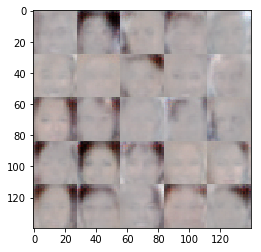

Epoch 1/1... Discriminator Loss: 0.1323... Generator Loss: 7.4228
Epoch 1/1... Discriminator Loss: 0.4576... Generator Loss: 2.5472
Epoch 1/1... Discriminator Loss: 0.1579... Generator Loss: 4.3551
Epoch 1/1... Discriminator Loss: 0.3532... Generator Loss: 3.3094
Epoch 1/1... Discriminator Loss: 0.3046... Generator Loss: 2.8075
Epoch 1/1... Discriminator Loss: 0.2703... Generator Loss: 5.0493
Epoch 1/1... Discriminator Loss: 1.2980... Generator Loss: 0.8016
Epoch 1/1... Discriminator Loss: 0.6755... Generator Loss: 1.3451
Epoch 1/1... Discriminator Loss: 0.6313... Generator Loss: 1.5786
Epoch 1/1... Discriminator Loss: 0.6170... Generator Loss: 1.5276


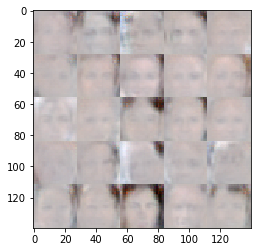

Epoch 1/1... Discriminator Loss: 1.0622... Generator Loss: 3.9894
Epoch 1/1... Discriminator Loss: 0.7208... Generator Loss: 1.1258
Epoch 1/1... Discriminator Loss: 0.3087... Generator Loss: 2.3906
Epoch 1/1... Discriminator Loss: 0.9190... Generator Loss: 0.7975
Epoch 1/1... Discriminator Loss: 0.2918... Generator Loss: 3.6624
Epoch 1/1... Discriminator Loss: 0.2655... Generator Loss: 3.7756
Epoch 1/1... Discriminator Loss: 0.1610... Generator Loss: 5.1383
Epoch 1/1... Discriminator Loss: 0.5883... Generator Loss: 4.0861
Epoch 1/1... Discriminator Loss: 0.2446... Generator Loss: 3.7625
Epoch 1/1... Discriminator Loss: 0.9109... Generator Loss: 5.6258


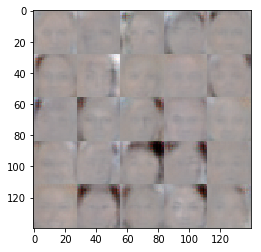

Epoch 1/1... Discriminator Loss: 0.4425... Generator Loss: 2.0539
Epoch 1/1... Discriminator Loss: 0.3135... Generator Loss: 2.6889
Epoch 1/1... Discriminator Loss: 0.5517... Generator Loss: 5.1030
Epoch 1/1... Discriminator Loss: 0.4260... Generator Loss: 1.8666
Epoch 1/1... Discriminator Loss: 1.5705... Generator Loss: 0.3888
Epoch 1/1... Discriminator Loss: 0.4769... Generator Loss: 2.3299
Epoch 1/1... Discriminator Loss: 0.4130... Generator Loss: 3.3785
Epoch 1/1... Discriminator Loss: 0.4691... Generator Loss: 1.6505
Epoch 1/1... Discriminator Loss: 0.1866... Generator Loss: 4.0751
Epoch 1/1... Discriminator Loss: 0.2739... Generator Loss: 3.0623


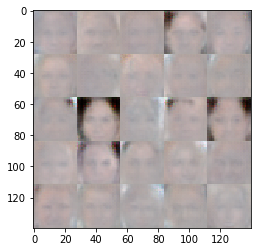

Epoch 1/1... Discriminator Loss: 0.2103... Generator Loss: 3.5651
Epoch 1/1... Discriminator Loss: 0.8958... Generator Loss: 1.6216
Epoch 1/1... Discriminator Loss: 0.7930... Generator Loss: 1.2847
Epoch 1/1... Discriminator Loss: 0.8674... Generator Loss: 1.0112
Epoch 1/1... Discriminator Loss: 0.4321... Generator Loss: 2.6052
Epoch 1/1... Discriminator Loss: 0.5261... Generator Loss: 1.8804
Epoch 1/1... Discriminator Loss: 0.6179... Generator Loss: 2.2568
Epoch 1/1... Discriminator Loss: 0.4049... Generator Loss: 2.2305
Epoch 1/1... Discriminator Loss: 0.6083... Generator Loss: 2.5632
Epoch 1/1... Discriminator Loss: 0.2788... Generator Loss: 2.6767


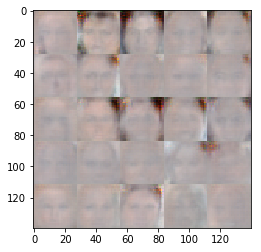

Epoch 1/1... Discriminator Loss: 0.3670... Generator Loss: 3.1903
Epoch 1/1... Discriminator Loss: 0.6650... Generator Loss: 1.9900
Epoch 1/1... Discriminator Loss: 0.6197... Generator Loss: 2.0895
Epoch 1/1... Discriminator Loss: 0.3625... Generator Loss: 2.5395
Epoch 1/1... Discriminator Loss: 1.2634... Generator Loss: 4.0441
Epoch 1/1... Discriminator Loss: 0.6236... Generator Loss: 1.8749
Epoch 1/1... Discriminator Loss: 0.6734... Generator Loss: 1.6988
Epoch 1/1... Discriminator Loss: 0.3813... Generator Loss: 2.5839
Epoch 1/1... Discriminator Loss: 0.7060... Generator Loss: 1.3116
Epoch 1/1... Discriminator Loss: 0.8832... Generator Loss: 0.8821


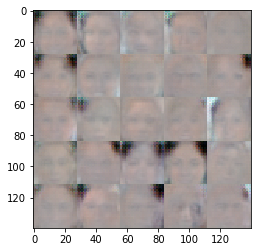

Epoch 1/1... Discriminator Loss: 0.5394... Generator Loss: 1.7311
Epoch 1/1... Discriminator Loss: 0.4798... Generator Loss: 1.4476
Epoch 1/1... Discriminator Loss: 0.8201... Generator Loss: 1.0681
Epoch 1/1... Discriminator Loss: 0.6893... Generator Loss: 2.2708
Epoch 1/1... Discriminator Loss: 0.3509... Generator Loss: 2.3712
Epoch 1/1... Discriminator Loss: 0.5453... Generator Loss: 1.7168
Epoch 1/1... Discriminator Loss: 0.2140... Generator Loss: 4.0658
Epoch 1/1... Discriminator Loss: 0.4734... Generator Loss: 1.7747
Epoch 1/1... Discriminator Loss: 0.2950... Generator Loss: 2.9430
Epoch 1/1... Discriminator Loss: 0.5266... Generator Loss: 3.2498


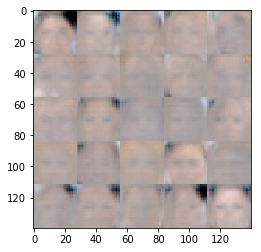

Epoch 1/1... Discriminator Loss: 2.4221... Generator Loss: 4.5229
Epoch 1/1... Discriminator Loss: 0.9759... Generator Loss: 0.7205
Epoch 1/1... Discriminator Loss: 0.4058... Generator Loss: 3.9940
Epoch 1/1... Discriminator Loss: 0.2966... Generator Loss: 2.6867
Epoch 1/1... Discriminator Loss: 0.3270... Generator Loss: 3.0884
Epoch 1/1... Discriminator Loss: 1.2340... Generator Loss: 2.8300
Epoch 1/1... Discriminator Loss: 0.7417... Generator Loss: 2.0670
Epoch 1/1... Discriminator Loss: 0.5936... Generator Loss: 1.4126
Epoch 1/1... Discriminator Loss: 0.7563... Generator Loss: 0.9444
Epoch 1/1... Discriminator Loss: 0.3681... Generator Loss: 2.5404


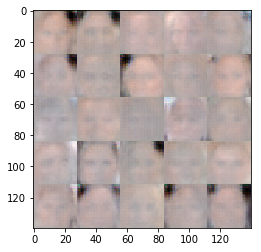

Epoch 1/1... Discriminator Loss: 0.6672... Generator Loss: 1.2353
Epoch 1/1... Discriminator Loss: 0.2827... Generator Loss: 2.8504
Epoch 1/1... Discriminator Loss: 0.5624... Generator Loss: 2.6895
Epoch 1/1... Discriminator Loss: 0.7863... Generator Loss: 4.0472
Epoch 1/1... Discriminator Loss: 0.4886... Generator Loss: 1.8244
Epoch 1/1... Discriminator Loss: 0.3851... Generator Loss: 3.2729
Epoch 1/1... Discriminator Loss: 0.5129... Generator Loss: 2.4319
Epoch 1/1... Discriminator Loss: 0.4114... Generator Loss: 2.6792
Epoch 1/1... Discriminator Loss: 0.6288... Generator Loss: 1.3745
Epoch 1/1... Discriminator Loss: 0.2495... Generator Loss: 3.8407


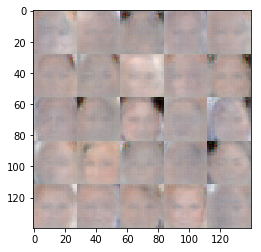

Epoch 1/1... Discriminator Loss: 0.8338... Generator Loss: 1.0251
Epoch 1/1... Discriminator Loss: 0.7611... Generator Loss: 1.1744
Epoch 1/1... Discriminator Loss: 0.3659... Generator Loss: 3.0597
Epoch 1/1... Discriminator Loss: 0.7427... Generator Loss: 0.9246
Epoch 1/1... Discriminator Loss: 0.7550... Generator Loss: 3.0715
Epoch 1/1... Discriminator Loss: 0.7446... Generator Loss: 0.9109
Epoch 1/1... Discriminator Loss: 0.8959... Generator Loss: 0.8629
Epoch 1/1... Discriminator Loss: 0.7508... Generator Loss: 1.1862
Epoch 1/1... Discriminator Loss: 0.8380... Generator Loss: 0.8624
Epoch 1/1... Discriminator Loss: 0.7910... Generator Loss: 0.9623


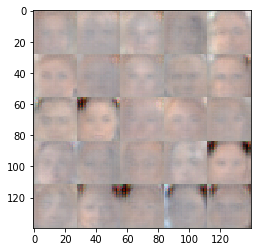

Epoch 1/1... Discriminator Loss: 0.3227... Generator Loss: 2.5098
Epoch 1/1... Discriminator Loss: 1.1196... Generator Loss: 2.6746
Epoch 1/1... Discriminator Loss: 0.1929... Generator Loss: 5.1762
Epoch 1/1... Discriminator Loss: 0.6363... Generator Loss: 2.4160
Epoch 1/1... Discriminator Loss: 0.6390... Generator Loss: 1.3307
Epoch 1/1... Discriminator Loss: 0.4450... Generator Loss: 2.0733
Epoch 1/1... Discriminator Loss: 0.8188... Generator Loss: 0.9312
Epoch 1/1... Discriminator Loss: 0.5932... Generator Loss: 1.3795
Epoch 1/1... Discriminator Loss: 0.5080... Generator Loss: 5.0480
Epoch 1/1... Discriminator Loss: 0.6774... Generator Loss: 2.3120


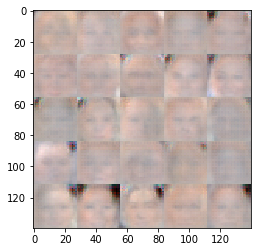

Epoch 1/1... Discriminator Loss: 0.9935... Generator Loss: 0.7977
Epoch 1/1... Discriminator Loss: 0.4697... Generator Loss: 3.4858
Epoch 1/1... Discriminator Loss: 0.2263... Generator Loss: 3.5621
Epoch 1/1... Discriminator Loss: 0.4682... Generator Loss: 1.9861
Epoch 1/1... Discriminator Loss: 0.9362... Generator Loss: 1.2070
Epoch 1/1... Discriminator Loss: 0.5963... Generator Loss: 1.4448
Epoch 1/1... Discriminator Loss: 0.7328... Generator Loss: 1.2653
Epoch 1/1... Discriminator Loss: 0.3041... Generator Loss: 3.6047
Epoch 1/1... Discriminator Loss: 0.7935... Generator Loss: 0.9484
Epoch 1/1... Discriminator Loss: 0.1181... Generator Loss: 5.1467


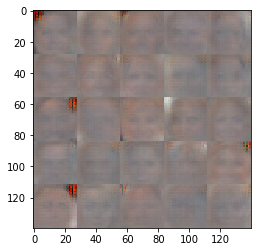

Epoch 1/1... Discriminator Loss: 0.5103... Generator Loss: 1.9223
Epoch 1/1... Discriminator Loss: 0.5183... Generator Loss: 1.4438
Epoch 1/1... Discriminator Loss: 1.2100... Generator Loss: 0.5477
Epoch 1/1... Discriminator Loss: 0.6790... Generator Loss: 1.1168
Epoch 1/1... Discriminator Loss: 0.5027... Generator Loss: 2.7588
Epoch 1/1... Discriminator Loss: 0.8625... Generator Loss: 1.0136
Epoch 1/1... Discriminator Loss: 0.4307... Generator Loss: 1.9447
Epoch 1/1... Discriminator Loss: 0.5311... Generator Loss: 1.6224
Epoch 1/1... Discriminator Loss: 0.4113... Generator Loss: 1.8734
Epoch 1/1... Discriminator Loss: 0.4188... Generator Loss: 2.0611


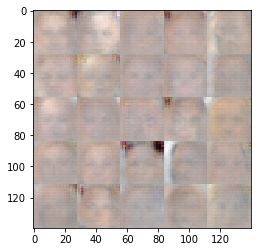

Epoch 1/1... Discriminator Loss: 0.2757... Generator Loss: 2.6536
Epoch 1/1... Discriminator Loss: 0.4462... Generator Loss: 1.7985
Epoch 1/1... Discriminator Loss: 0.8496... Generator Loss: 3.2196
Epoch 1/1... Discriminator Loss: 1.0987... Generator Loss: 1.0611
Epoch 1/1... Discriminator Loss: 0.7502... Generator Loss: 1.0400
Epoch 1/1... Discriminator Loss: 0.3306... Generator Loss: 2.2613
Epoch 1/1... Discriminator Loss: 0.3346... Generator Loss: 3.7878
Epoch 1/1... Discriminator Loss: 0.9713... Generator Loss: 1.4857
Epoch 1/1... Discriminator Loss: 0.5933... Generator Loss: 1.9691
Epoch 1/1... Discriminator Loss: 0.6305... Generator Loss: 1.2887


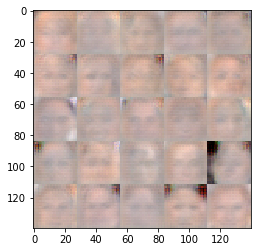

Epoch 1/1... Discriminator Loss: 0.4453... Generator Loss: 2.2429
Epoch 1/1... Discriminator Loss: 0.6245... Generator Loss: 3.2626
Epoch 1/1... Discriminator Loss: 0.6085... Generator Loss: 1.5105
Epoch 1/1... Discriminator Loss: 0.5089... Generator Loss: 1.3911
Epoch 1/1... Discriminator Loss: 0.5115... Generator Loss: 2.1168
Epoch 1/1... Discriminator Loss: 0.3354... Generator Loss: 3.3272
Epoch 1/1... Discriminator Loss: 0.2471... Generator Loss: 4.3707
Epoch 1/1... Discriminator Loss: 1.0981... Generator Loss: 0.8960
Epoch 1/1... Discriminator Loss: 0.3701... Generator Loss: 2.3486
Epoch 1/1... Discriminator Loss: 2.8184... Generator Loss: 5.3109


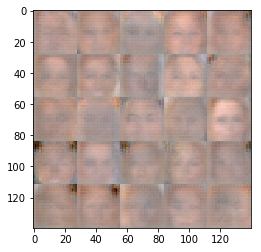

Epoch 1/1... Discriminator Loss: 0.7672... Generator Loss: 1.0573
Epoch 1/1... Discriminator Loss: 0.7129... Generator Loss: 1.8968
Epoch 1/1... Discriminator Loss: 0.5102... Generator Loss: 1.8788
Epoch 1/1... Discriminator Loss: 0.4603... Generator Loss: 2.1733
Epoch 1/1... Discriminator Loss: 0.3365... Generator Loss: 3.2688
Epoch 1/1... Discriminator Loss: 0.1336... Generator Loss: 5.6277
Epoch 1/1... Discriminator Loss: 0.7935... Generator Loss: 1.3958
Epoch 1/1... Discriminator Loss: 0.4939... Generator Loss: 1.5641
Epoch 1/1... Discriminator Loss: 0.6086... Generator Loss: 2.0686
Epoch 1/1... Discriminator Loss: 0.8466... Generator Loss: 0.8829


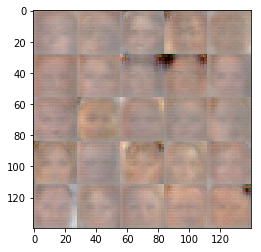

Epoch 1/1... Discriminator Loss: 0.5163... Generator Loss: 3.0550
Epoch 1/1... Discriminator Loss: 0.7297... Generator Loss: 1.1791
Epoch 1/1... Discriminator Loss: 0.7424... Generator Loss: 1.0678
Epoch 1/1... Discriminator Loss: 0.4377... Generator Loss: 2.0035
Epoch 1/1... Discriminator Loss: 0.7702... Generator Loss: 0.9026
Epoch 1/1... Discriminator Loss: 1.1533... Generator Loss: 1.0220
Epoch 1/1... Discriminator Loss: 0.2562... Generator Loss: 4.1651
Epoch 1/1... Discriminator Loss: 0.5440... Generator Loss: 2.4202
Epoch 1/1... Discriminator Loss: 0.3947... Generator Loss: 1.9252
Epoch 1/1... Discriminator Loss: 0.5791... Generator Loss: 1.5018


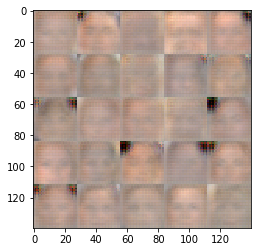

Epoch 1/1... Discriminator Loss: 0.9349... Generator Loss: 0.9426
Epoch 1/1... Discriminator Loss: 0.9020... Generator Loss: 1.0073
Epoch 1/1... Discriminator Loss: 0.2148... Generator Loss: 3.5269
Epoch 1/1... Discriminator Loss: 0.2874... Generator Loss: 4.1292
Epoch 1/1... Discriminator Loss: 0.5963... Generator Loss: 2.0035
Epoch 1/1... Discriminator Loss: 0.3502... Generator Loss: 2.7144
Epoch 1/1... Discriminator Loss: 0.2979... Generator Loss: 3.1577
Epoch 1/1... Discriminator Loss: 0.3537... Generator Loss: 2.4206
Epoch 1/1... Discriminator Loss: 0.3728... Generator Loss: 3.7810
Epoch 1/1... Discriminator Loss: 1.0967... Generator Loss: 0.7249


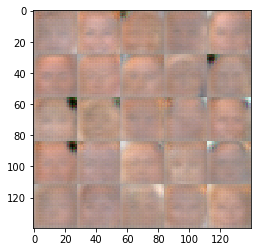

Epoch 1/1... Discriminator Loss: 2.2697... Generator Loss: 5.0110
Epoch 1/1... Discriminator Loss: 0.5440... Generator Loss: 3.0528
Epoch 1/1... Discriminator Loss: 0.6683... Generator Loss: 1.1352
Epoch 1/1... Discriminator Loss: 1.4567... Generator Loss: 0.5430
Epoch 1/1... Discriminator Loss: 0.6185... Generator Loss: 2.2307
Epoch 1/1... Discriminator Loss: 0.4146... Generator Loss: 2.5172
Epoch 1/1... Discriminator Loss: 0.5943... Generator Loss: 1.6127
Epoch 1/1... Discriminator Loss: 0.4804... Generator Loss: 1.9057
Epoch 1/1... Discriminator Loss: 1.1943... Generator Loss: 0.5143
Epoch 1/1... Discriminator Loss: 0.3105... Generator Loss: 3.1294


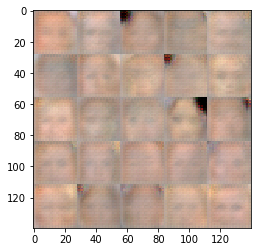

Epoch 1/1... Discriminator Loss: 0.9482... Generator Loss: 1.8802
Epoch 1/1... Discriminator Loss: 0.2248... Generator Loss: 7.9884
Epoch 1/1... Discriminator Loss: 1.2459... Generator Loss: 3.6668
Epoch 1/1... Discriminator Loss: 0.5219... Generator Loss: 2.0093
Epoch 1/1... Discriminator Loss: 0.8870... Generator Loss: 0.7631
Epoch 1/1... Discriminator Loss: 0.7118... Generator Loss: 1.6983
Epoch 1/1... Discriminator Loss: 0.5471... Generator Loss: 1.6316
Epoch 1/1... Discriminator Loss: 0.4426... Generator Loss: 2.0659
Epoch 1/1... Discriminator Loss: 0.4683... Generator Loss: 1.9775
Epoch 1/1... Discriminator Loss: 0.2612... Generator Loss: 2.6379


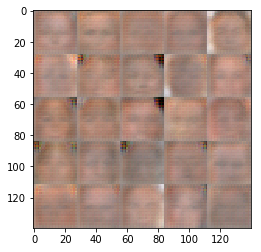

Epoch 1/1... Discriminator Loss: 0.2634... Generator Loss: 2.9522
Epoch 1/1... Discriminator Loss: 0.4547... Generator Loss: 2.1764
Epoch 1/1... Discriminator Loss: 0.8250... Generator Loss: 3.9559
Epoch 1/1... Discriminator Loss: 0.6281... Generator Loss: 1.1588
Epoch 1/1... Discriminator Loss: 0.5807... Generator Loss: 1.8259
Epoch 1/1... Discriminator Loss: 0.7760... Generator Loss: 2.1261
Epoch 1/1... Discriminator Loss: 1.2263... Generator Loss: 0.9171
Epoch 1/1... Discriminator Loss: 0.7375... Generator Loss: 1.3956
Epoch 1/1... Discriminator Loss: 0.4649... Generator Loss: 2.3983
Epoch 1/1... Discriminator Loss: 0.5582... Generator Loss: 1.7561


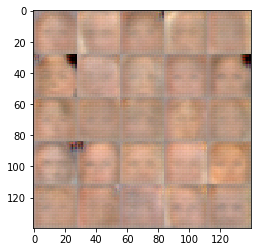

Epoch 1/1... Discriminator Loss: 0.5729... Generator Loss: 1.5390
Epoch 1/1... Discriminator Loss: 1.6788... Generator Loss: 5.5661
Epoch 1/1... Discriminator Loss: 0.7521... Generator Loss: 1.3632
Epoch 1/1... Discriminator Loss: 0.8618... Generator Loss: 0.8840
Epoch 1/1... Discriminator Loss: 0.2839... Generator Loss: 2.4666
Epoch 1/1... Discriminator Loss: 0.7909... Generator Loss: 1.1412
Epoch 1/1... Discriminator Loss: 0.9528... Generator Loss: 0.7122
Epoch 1/1... Discriminator Loss: 0.2636... Generator Loss: 3.5732
Epoch 1/1... Discriminator Loss: 0.6729... Generator Loss: 1.3610
Epoch 1/1... Discriminator Loss: 0.3659... Generator Loss: 2.4024


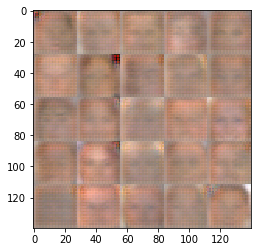

Epoch 1/1... Discriminator Loss: 0.8318... Generator Loss: 1.1955
Epoch 1/1... Discriminator Loss: 0.7025... Generator Loss: 1.2354
Epoch 1/1... Discriminator Loss: 0.8428... Generator Loss: 1.4217
Epoch 1/1... Discriminator Loss: 0.3785... Generator Loss: 2.1354
Epoch 1/1... Discriminator Loss: 0.7246... Generator Loss: 2.8005
Epoch 1/1... Discriminator Loss: 0.3157... Generator Loss: 3.3487
Epoch 1/1... Discriminator Loss: 0.8875... Generator Loss: 0.9498
Epoch 1/1... Discriminator Loss: 0.7634... Generator Loss: 1.7578
Epoch 1/1... Discriminator Loss: 0.5769... Generator Loss: 2.3658
Epoch 1/1... Discriminator Loss: 0.6934... Generator Loss: 1.3941


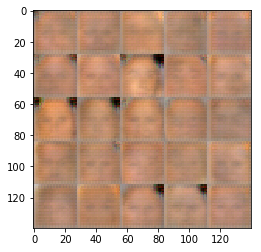

Epoch 1/1... Discriminator Loss: 0.4517... Generator Loss: 2.0022
Epoch 1/1... Discriminator Loss: 0.7313... Generator Loss: 1.2687
Epoch 1/1... Discriminator Loss: 0.8390... Generator Loss: 0.9384
Epoch 1/1... Discriminator Loss: 0.3024... Generator Loss: 2.0726
Epoch 1/1... Discriminator Loss: 0.5670... Generator Loss: 2.4783
Epoch 1/1... Discriminator Loss: 0.3261... Generator Loss: 4.0369
Epoch 1/1... Discriminator Loss: 0.7394... Generator Loss: 1.4030
Epoch 1/1... Discriminator Loss: 0.6248... Generator Loss: 1.4308
Epoch 1/1... Discriminator Loss: 0.5559... Generator Loss: 2.1331
Epoch 1/1... Discriminator Loss: 0.6506... Generator Loss: 1.6199


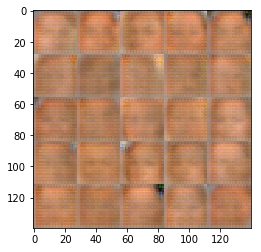

Epoch 1/1... Discriminator Loss: 0.4647... Generator Loss: 2.1177
Epoch 1/1... Discriminator Loss: 2.1004... Generator Loss: 4.1020
Epoch 1/1... Discriminator Loss: 0.3375... Generator Loss: 3.7017
Epoch 1/1... Discriminator Loss: 0.4525... Generator Loss: 2.1792
Epoch 1/1... Discriminator Loss: 0.6432... Generator Loss: 1.7758
Epoch 1/1... Discriminator Loss: 0.6442... Generator Loss: 1.2957
Epoch 1/1... Discriminator Loss: 1.7303... Generator Loss: 0.3554
Epoch 1/1... Discriminator Loss: 0.5823... Generator Loss: 2.4768
Epoch 1/1... Discriminator Loss: 0.4823... Generator Loss: 1.7115
Epoch 1/1... Discriminator Loss: 0.3593... Generator Loss: 2.4761


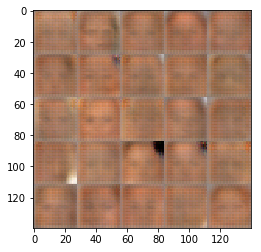

Epoch 1/1... Discriminator Loss: 0.2473... Generator Loss: 4.1665
Epoch 1/1... Discriminator Loss: 0.3886... Generator Loss: 2.4353
Epoch 1/1... Discriminator Loss: 0.6497... Generator Loss: 1.6405
Epoch 1/1... Discriminator Loss: 0.7242... Generator Loss: 2.1803
Epoch 1/1... Discriminator Loss: 0.9917... Generator Loss: 0.7532
Epoch 1/1... Discriminator Loss: 0.3098... Generator Loss: 2.8094
Epoch 1/1... Discriminator Loss: 0.5904... Generator Loss: 1.5758
Epoch 1/1... Discriminator Loss: 0.7008... Generator Loss: 1.1489
Epoch 1/1... Discriminator Loss: 0.9006... Generator Loss: 2.4369
Epoch 1/1... Discriminator Loss: 0.7542... Generator Loss: 1.0423


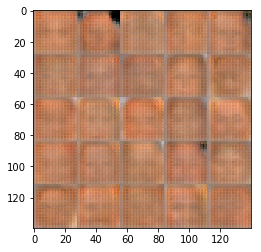

Epoch 1/1... Discriminator Loss: 0.7919... Generator Loss: 3.7693
Epoch 1/1... Discriminator Loss: 0.5176... Generator Loss: 2.2733
Epoch 1/1... Discriminator Loss: 0.8035... Generator Loss: 1.1831
Epoch 1/1... Discriminator Loss: 0.4098... Generator Loss: 1.8871
Epoch 1/1... Discriminator Loss: 1.4981... Generator Loss: 0.4757
Epoch 1/1... Discriminator Loss: 0.6086... Generator Loss: 1.3555
Epoch 1/1... Discriminator Loss: 0.4651... Generator Loss: 1.5858
Epoch 1/1... Discriminator Loss: 0.3501... Generator Loss: 4.7153
Epoch 1/1... Discriminator Loss: 0.4299... Generator Loss: 2.1025
Epoch 1/1... Discriminator Loss: 0.8453... Generator Loss: 2.8602


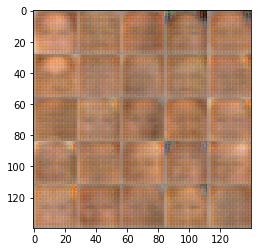

Epoch 1/1... Discriminator Loss: 0.5543... Generator Loss: 1.2867
Epoch 1/1... Discriminator Loss: 0.6179... Generator Loss: 1.5638
Epoch 1/1... Discriminator Loss: 1.6877... Generator Loss: 0.6651
Epoch 1/1... Discriminator Loss: 0.8002... Generator Loss: 2.1817
Epoch 1/1... Discriminator Loss: 0.6475... Generator Loss: 1.8726
Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 3.1296
Epoch 1/1... Discriminator Loss: 0.4893... Generator Loss: 2.0638
Epoch 1/1... Discriminator Loss: 0.2868... Generator Loss: 3.7298
Epoch 1/1... Discriminator Loss: 1.2298... Generator Loss: 0.7380
Epoch 1/1... Discriminator Loss: 0.3232... Generator Loss: 2.6669


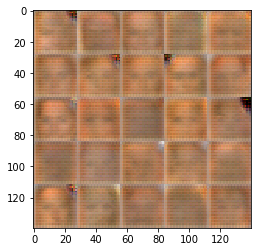

Epoch 1/1... Discriminator Loss: 0.2662... Generator Loss: 4.1080
Epoch 1/1... Discriminator Loss: 0.4271... Generator Loss: 2.3086
Epoch 1/1... Discriminator Loss: 0.6921... Generator Loss: 1.2284
Epoch 1/1... Discriminator Loss: 0.8738... Generator Loss: 1.8243
Epoch 1/1... Discriminator Loss: 0.4698... Generator Loss: 2.0577
Epoch 1/1... Discriminator Loss: 0.5944... Generator Loss: 1.6190
Epoch 1/1... Discriminator Loss: 0.7445... Generator Loss: 1.9812
Epoch 1/1... Discriminator Loss: 0.4317... Generator Loss: 1.8364
Epoch 1/1... Discriminator Loss: 0.4992... Generator Loss: 1.6858
Epoch 1/1... Discriminator Loss: 1.0021... Generator Loss: 0.8717


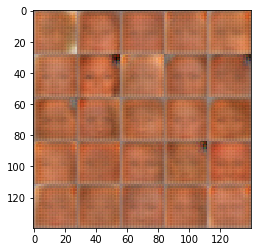

Epoch 1/1... Discriminator Loss: 1.0329... Generator Loss: 0.6693
Epoch 1/1... Discriminator Loss: 0.4582... Generator Loss: 1.6762
Epoch 1/1... Discriminator Loss: 0.5422... Generator Loss: 1.7994
Epoch 1/1... Discriminator Loss: 1.2593... Generator Loss: 2.9421
Epoch 1/1... Discriminator Loss: 0.7990... Generator Loss: 1.3415
Epoch 1/1... Discriminator Loss: 0.8630... Generator Loss: 0.8811
Epoch 1/1... Discriminator Loss: 0.6800... Generator Loss: 2.3708
Epoch 1/1... Discriminator Loss: 0.9883... Generator Loss: 0.7568
Epoch 1/1... Discriminator Loss: 1.2254... Generator Loss: 0.6466
Epoch 1/1... Discriminator Loss: 0.5291... Generator Loss: 1.6882


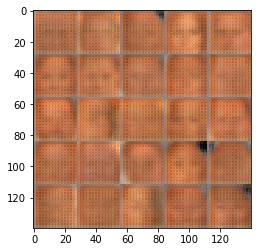

Epoch 1/1... Discriminator Loss: 0.3694... Generator Loss: 2.5386
Epoch 1/1... Discriminator Loss: 2.1075... Generator Loss: 4.1643
Epoch 1/1... Discriminator Loss: 0.4509... Generator Loss: 1.7324
Epoch 1/1... Discriminator Loss: 0.6031... Generator Loss: 1.8685
Epoch 1/1... Discriminator Loss: 0.4297... Generator Loss: 2.1349
Epoch 1/1... Discriminator Loss: 0.7455... Generator Loss: 1.1491
Epoch 1/1... Discriminator Loss: 0.7192... Generator Loss: 1.0268
Epoch 1/1... Discriminator Loss: 0.4508... Generator Loss: 1.7128
Epoch 1/1... Discriminator Loss: 0.6564... Generator Loss: 1.4072
Epoch 1/1... Discriminator Loss: 0.3970... Generator Loss: 2.5392


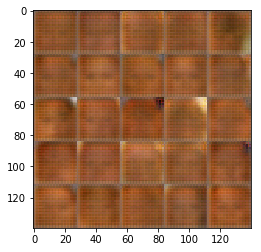

Epoch 1/1... Discriminator Loss: 0.8823... Generator Loss: 0.8518
Epoch 1/1... Discriminator Loss: 1.0817... Generator Loss: 2.8033
Epoch 1/1... Discriminator Loss: 0.8736... Generator Loss: 1.0619
Epoch 1/1... Discriminator Loss: 0.4280... Generator Loss: 1.7250
Epoch 1/1... Discriminator Loss: 0.8868... Generator Loss: 2.5387
Epoch 1/1... Discriminator Loss: 0.5465... Generator Loss: 2.2578
Epoch 1/1... Discriminator Loss: 0.4800... Generator Loss: 2.2669
Epoch 1/1... Discriminator Loss: 0.4338... Generator Loss: 3.0081
Epoch 1/1... Discriminator Loss: 0.5128... Generator Loss: 2.0340
Epoch 1/1... Discriminator Loss: 0.7108... Generator Loss: 3.1297


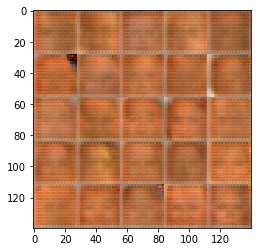

Epoch 1/1... Discriminator Loss: 0.9160... Generator Loss: 0.8813
Epoch 1/1... Discriminator Loss: 1.0685... Generator Loss: 3.2958
Epoch 1/1... Discriminator Loss: 1.2801... Generator Loss: 0.4627
Epoch 1/1... Discriminator Loss: 0.6308... Generator Loss: 2.0505
Epoch 1/1... Discriminator Loss: 1.0053... Generator Loss: 0.8671
Epoch 1/1... Discriminator Loss: 0.5574... Generator Loss: 1.3621
Epoch 1/1... Discriminator Loss: 0.5622... Generator Loss: 1.8610
Epoch 1/1... Discriminator Loss: 0.5248... Generator Loss: 1.3856
Epoch 1/1... Discriminator Loss: 0.9682... Generator Loss: 0.8087
Epoch 1/1... Discriminator Loss: 0.3250... Generator Loss: 2.5270


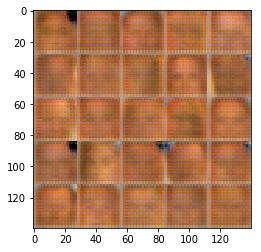

Epoch 1/1... Discriminator Loss: 0.6652... Generator Loss: 4.7864
Epoch 1/1... Discriminator Loss: 0.5828... Generator Loss: 1.6378
Epoch 1/1... Discriminator Loss: 0.6972... Generator Loss: 1.1016
Epoch 1/1... Discriminator Loss: 0.8938... Generator Loss: 0.8946
Epoch 1/1... Discriminator Loss: 0.7477... Generator Loss: 1.1177
Epoch 1/1... Discriminator Loss: 0.7057... Generator Loss: 1.1276
Epoch 1/1... Discriminator Loss: 0.5334... Generator Loss: 2.1836
Epoch 1/1... Discriminator Loss: 2.2826... Generator Loss: 3.8349
Epoch 1/1... Discriminator Loss: 0.9342... Generator Loss: 0.7834
Epoch 1/1... Discriminator Loss: 0.7130... Generator Loss: 1.6239


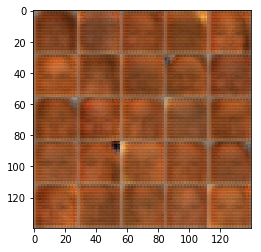

Epoch 1/1... Discriminator Loss: 1.0289... Generator Loss: 0.7383
Epoch 1/1... Discriminator Loss: 0.6191... Generator Loss: 1.5897
Epoch 1/1... Discriminator Loss: 1.1145... Generator Loss: 1.9487
Epoch 1/1... Discriminator Loss: 0.7611... Generator Loss: 1.9807
Epoch 1/1... Discriminator Loss: 0.7508... Generator Loss: 0.9902
Epoch 1/1... Discriminator Loss: 0.6842... Generator Loss: 1.6105
Epoch 1/1... Discriminator Loss: 1.1987... Generator Loss: 0.5573
Epoch 1/1... Discriminator Loss: 1.1352... Generator Loss: 0.5857
Epoch 1/1... Discriminator Loss: 0.7271... Generator Loss: 1.6636
Epoch 1/1... Discriminator Loss: 1.1769... Generator Loss: 0.6795


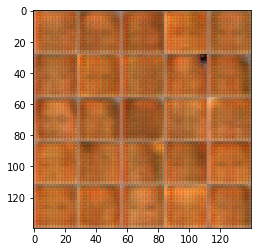

Epoch 1/1... Discriminator Loss: 0.9364... Generator Loss: 0.8868
Epoch 1/1... Discriminator Loss: 0.7703... Generator Loss: 1.5927
Epoch 1/1... Discriminator Loss: 1.3010... Generator Loss: 0.4307
Epoch 1/1... Discriminator Loss: 1.0599... Generator Loss: 0.6812
Epoch 1/1... Discriminator Loss: 0.8935... Generator Loss: 0.8897
Epoch 1/1... Discriminator Loss: 0.8168... Generator Loss: 1.0184
Epoch 1/1... Discriminator Loss: 1.0053... Generator Loss: 0.7254
Epoch 1/1... Discriminator Loss: 0.9189... Generator Loss: 1.4094
Epoch 1/1... Discriminator Loss: 0.2583... Generator Loss: 3.4892
Epoch 1/1... Discriminator Loss: 0.8021... Generator Loss: 0.9437


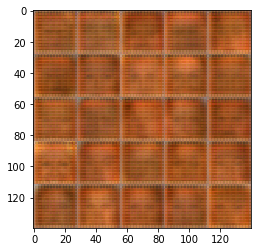

Epoch 1/1... Discriminator Loss: 1.2511... Generator Loss: 0.5489
Epoch 1/1... Discriminator Loss: 0.3387... Generator Loss: 3.9502
Epoch 1/1... Discriminator Loss: 0.6677... Generator Loss: 1.0597
Epoch 1/1... Discriminator Loss: 0.6930... Generator Loss: 1.6032
Epoch 1/1... Discriminator Loss: 0.1924... Generator Loss: 3.8867
Epoch 1/1... Discriminator Loss: 0.9933... Generator Loss: 3.1193
Epoch 1/1... Discriminator Loss: 0.8363... Generator Loss: 1.9535
Epoch 1/1... Discriminator Loss: 0.7924... Generator Loss: 1.8208
Epoch 1/1... Discriminator Loss: 0.6418... Generator Loss: 1.9074
Epoch 1/1... Discriminator Loss: 1.8296... Generator Loss: 0.2723


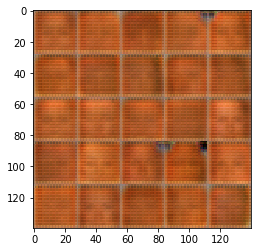

Epoch 1/1... Discriminator Loss: 0.8587... Generator Loss: 1.3399
Epoch 1/1... Discriminator Loss: 0.4752... Generator Loss: 3.0023
Epoch 1/1... Discriminator Loss: 0.5348... Generator Loss: 2.1424
Epoch 1/1... Discriminator Loss: 0.5719... Generator Loss: 1.9672
Epoch 1/1... Discriminator Loss: 1.0179... Generator Loss: 0.6871
Epoch 1/1... Discriminator Loss: 0.9063... Generator Loss: 1.0845
Epoch 1/1... Discriminator Loss: 0.6553... Generator Loss: 1.2245
Epoch 1/1... Discriminator Loss: 0.7311... Generator Loss: 1.1515
Epoch 1/1... Discriminator Loss: 0.4727... Generator Loss: 1.8298
Epoch 1/1... Discriminator Loss: 0.6847... Generator Loss: 1.4921


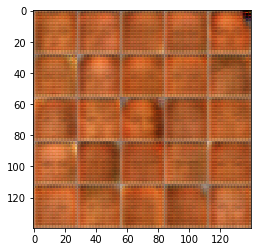

Epoch 1/1... Discriminator Loss: 0.7331... Generator Loss: 1.6711
Epoch 1/1... Discriminator Loss: 0.7083... Generator Loss: 1.1955
Epoch 1/1... Discriminator Loss: 0.9882... Generator Loss: 0.7949
Epoch 1/1... Discriminator Loss: 0.9000... Generator Loss: 0.8546
Epoch 1/1... Discriminator Loss: 0.4170... Generator Loss: 2.3710
Epoch 1/1... Discriminator Loss: 1.8466... Generator Loss: 0.2497
Epoch 1/1... Discriminator Loss: 0.6719... Generator Loss: 1.1694
Epoch 1/1... Discriminator Loss: 0.6880... Generator Loss: 1.2492
Epoch 1/1... Discriminator Loss: 1.0837... Generator Loss: 2.5163
Epoch 1/1... Discriminator Loss: 0.7442... Generator Loss: 1.2815


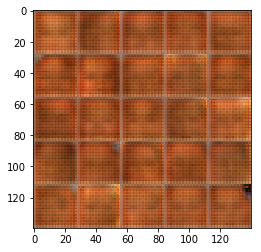

Epoch 1/1... Discriminator Loss: 0.9966... Generator Loss: 2.0913
Epoch 1/1... Discriminator Loss: 0.5919... Generator Loss: 2.3444
Epoch 1/1... Discriminator Loss: 0.9032... Generator Loss: 1.7221
Epoch 1/1... Discriminator Loss: 0.6051... Generator Loss: 1.7798
Epoch 1/1... Discriminator Loss: 0.6218... Generator Loss: 1.4392
Epoch 1/1... Discriminator Loss: 0.7170... Generator Loss: 1.8274
Epoch 1/1... Discriminator Loss: 0.9203... Generator Loss: 0.8258
Epoch 1/1... Discriminator Loss: 1.0096... Generator Loss: 1.7658
Epoch 1/1... Discriminator Loss: 0.3477... Generator Loss: 4.4664
Epoch 1/1... Discriminator Loss: 0.4832... Generator Loss: 2.4817


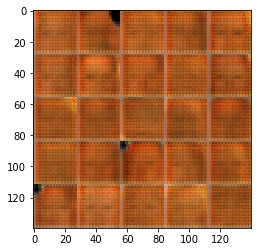

Epoch 1/1... Discriminator Loss: 0.7011... Generator Loss: 1.2278
Epoch 1/1... Discriminator Loss: 0.8405... Generator Loss: 1.2683
Epoch 1/1... Discriminator Loss: 0.3586... Generator Loss: 2.3108
Epoch 1/1... Discriminator Loss: 1.0168... Generator Loss: 3.3866
Epoch 1/1... Discriminator Loss: 0.8537... Generator Loss: 1.1125
Epoch 1/1... Discriminator Loss: 0.7029... Generator Loss: 1.7847
Epoch 1/1... Discriminator Loss: 0.8455... Generator Loss: 0.9940
Epoch 1/1... Discriminator Loss: 0.6918... Generator Loss: 1.5431
Epoch 1/1... Discriminator Loss: 0.4629... Generator Loss: 1.7481
Epoch 1/1... Discriminator Loss: 0.6245... Generator Loss: 1.5061


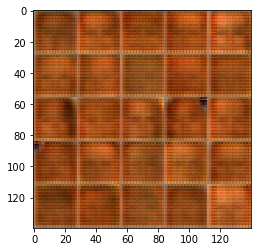

Epoch 1/1... Discriminator Loss: 0.6694... Generator Loss: 1.9414
Epoch 1/1... Discriminator Loss: 0.6751... Generator Loss: 2.0711
Epoch 1/1... Discriminator Loss: 0.8425... Generator Loss: 1.7364
Epoch 1/1... Discriminator Loss: 1.2588... Generator Loss: 0.7483
Epoch 1/1... Discriminator Loss: 0.5207... Generator Loss: 1.6249
Epoch 1/1... Discriminator Loss: 0.9346... Generator Loss: 1.0402
Epoch 1/1... Discriminator Loss: 0.5463... Generator Loss: 1.6217
Epoch 1/1... Discriminator Loss: 0.6994... Generator Loss: 2.4964
Epoch 1/1... Discriminator Loss: 1.1156... Generator Loss: 0.5731
Epoch 1/1... Discriminator Loss: 0.8077... Generator Loss: 1.3005


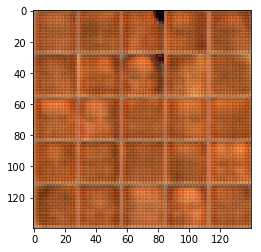

Epoch 1/1... Discriminator Loss: 0.6617... Generator Loss: 1.2481
Epoch 1/1... Discriminator Loss: 0.8272... Generator Loss: 1.6760
Epoch 1/1... Discriminator Loss: 0.9943... Generator Loss: 0.9269
Epoch 1/1... Discriminator Loss: 0.4635... Generator Loss: 1.8627
Epoch 1/1... Discriminator Loss: 0.8857... Generator Loss: 1.3300
Epoch 1/1... Discriminator Loss: 0.7642... Generator Loss: 1.0690
Epoch 1/1... Discriminator Loss: 0.7776... Generator Loss: 1.0099
Epoch 1/1... Discriminator Loss: 0.6798... Generator Loss: 1.5242
Epoch 1/1... Discriminator Loss: 1.2118... Generator Loss: 0.5356
Epoch 1/1... Discriminator Loss: 1.0235... Generator Loss: 0.7391


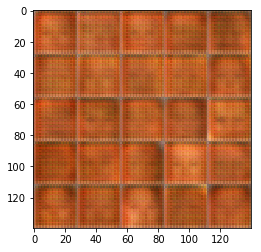

Epoch 1/1... Discriminator Loss: 0.9942... Generator Loss: 0.7163
Epoch 1/1... Discriminator Loss: 0.4191... Generator Loss: 2.5621
Epoch 1/1... Discriminator Loss: 0.6954... Generator Loss: 1.3180
Epoch 1/1... Discriminator Loss: 0.7326... Generator Loss: 1.5169
Epoch 1/1... Discriminator Loss: 0.6717... Generator Loss: 1.4798
Epoch 1/1... Discriminator Loss: 0.7964... Generator Loss: 1.1982
Epoch 1/1... Discriminator Loss: 0.6715... Generator Loss: 1.5042
Epoch 1/1... Discriminator Loss: 0.7124... Generator Loss: 1.6159
Epoch 1/1... Discriminator Loss: 0.5851... Generator Loss: 1.8199
Epoch 1/1... Discriminator Loss: 0.4881... Generator Loss: 1.5721


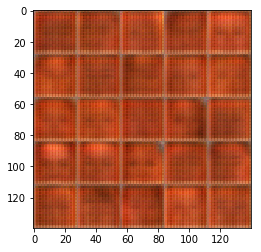

Epoch 1/1... Discriminator Loss: 1.3103... Generator Loss: 2.2538
Epoch 1/1... Discriminator Loss: 0.9745... Generator Loss: 0.7614
Epoch 1/1... Discriminator Loss: 0.7003... Generator Loss: 1.1863
Epoch 1/1... Discriminator Loss: 0.8893... Generator Loss: 1.0196
Epoch 1/1... Discriminator Loss: 1.0554... Generator Loss: 1.6516
Epoch 1/1... Discriminator Loss: 0.9036... Generator Loss: 1.4378
Epoch 1/1... Discriminator Loss: 0.8763... Generator Loss: 0.9038
Epoch 1/1... Discriminator Loss: 0.8834... Generator Loss: 0.8575
Epoch 1/1... Discriminator Loss: 0.9475... Generator Loss: 0.8020
Epoch 1/1... Discriminator Loss: 0.7812... Generator Loss: 0.9436


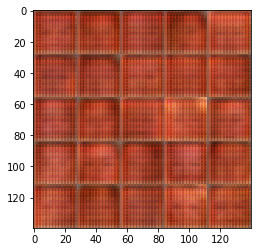

Epoch 1/1... Discriminator Loss: 0.6719... Generator Loss: 1.3473
Epoch 1/1... Discriminator Loss: 0.6242... Generator Loss: 2.1092
Epoch 1/1... Discriminator Loss: 0.8383... Generator Loss: 1.0489
Epoch 1/1... Discriminator Loss: 1.0078... Generator Loss: 0.8310
Epoch 1/1... Discriminator Loss: 1.4787... Generator Loss: 0.4851
Epoch 1/1... Discriminator Loss: 0.4725... Generator Loss: 2.5842
Epoch 1/1... Discriminator Loss: 0.7811... Generator Loss: 0.9602
Epoch 1/1... Discriminator Loss: 0.9364... Generator Loss: 0.8473
Epoch 1/1... Discriminator Loss: 0.9394... Generator Loss: 2.1005
Epoch 1/1... Discriminator Loss: 1.2585... Generator Loss: 0.4902


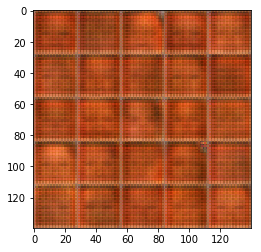

Epoch 1/1... Discriminator Loss: 0.9156... Generator Loss: 0.9813
Epoch 1/1... Discriminator Loss: 0.7612... Generator Loss: 1.5581
Epoch 1/1... Discriminator Loss: 0.5764... Generator Loss: 2.0677
Epoch 1/1... Discriminator Loss: 0.7439... Generator Loss: 1.2420
Epoch 1/1... Discriminator Loss: 0.8868... Generator Loss: 1.8719
Epoch 1/1... Discriminator Loss: 0.6257... Generator Loss: 1.3240
Epoch 1/1... Discriminator Loss: 0.9092... Generator Loss: 1.3332
Epoch 1/1... Discriminator Loss: 0.8041... Generator Loss: 1.0383
Epoch 1/1... Discriminator Loss: 1.4415... Generator Loss: 0.4576
Epoch 1/1... Discriminator Loss: 0.9703... Generator Loss: 1.2493


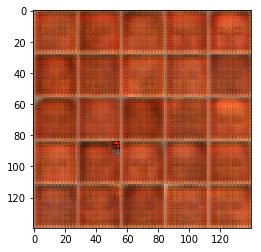

Epoch 1/1... Discriminator Loss: 0.8786... Generator Loss: 2.1847
Epoch 1/1... Discriminator Loss: 0.4961... Generator Loss: 2.0064
Epoch 1/1... Discriminator Loss: 0.4115... Generator Loss: 2.7416
Epoch 1/1... Discriminator Loss: 0.7267... Generator Loss: 1.1714
Epoch 1/1... Discriminator Loss: 0.6971... Generator Loss: 1.3741
Epoch 1/1... Discriminator Loss: 0.5389... Generator Loss: 1.5768
Epoch 1/1... Discriminator Loss: 0.8472... Generator Loss: 1.0462
Epoch 1/1... Discriminator Loss: 1.7025... Generator Loss: 0.3651
Epoch 1/1... Discriminator Loss: 0.9382... Generator Loss: 1.1030
Epoch 1/1... Discriminator Loss: 0.6116... Generator Loss: 2.3176


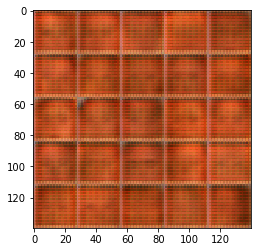

Epoch 1/1... Discriminator Loss: 1.0707... Generator Loss: 0.6609
Epoch 1/1... Discriminator Loss: 0.8290... Generator Loss: 1.8071
Epoch 1/1... Discriminator Loss: 0.7585... Generator Loss: 1.0051
Epoch 1/1... Discriminator Loss: 1.3168... Generator Loss: 0.5302
Epoch 1/1... Discriminator Loss: 0.5491... Generator Loss: 1.5958
Epoch 1/1... Discriminator Loss: 1.2169... Generator Loss: 0.5024
Epoch 1/1... Discriminator Loss: 0.8872... Generator Loss: 0.8092
Epoch 1/1... Discriminator Loss: 1.1525... Generator Loss: 1.4808
Epoch 1/1... Discriminator Loss: 1.3195... Generator Loss: 0.6004
Epoch 1/1... Discriminator Loss: 1.1298... Generator Loss: 0.6735


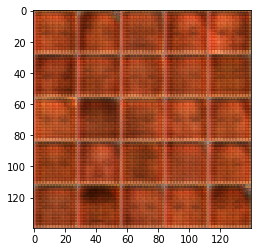

Epoch 1/1... Discriminator Loss: 1.2413... Generator Loss: 0.5981
Epoch 1/1... Discriminator Loss: 1.1365... Generator Loss: 0.6320
Epoch 1/1... Discriminator Loss: 0.8957... Generator Loss: 1.7521
Epoch 1/1... Discriminator Loss: 0.5737... Generator Loss: 4.0490
Epoch 1/1... Discriminator Loss: 0.5383... Generator Loss: 1.9388
Epoch 1/1... Discriminator Loss: 0.8619... Generator Loss: 0.8878
Epoch 1/1... Discriminator Loss: 1.1787... Generator Loss: 0.6554
Epoch 1/1... Discriminator Loss: 0.7548... Generator Loss: 1.5885
Epoch 1/1... Discriminator Loss: 0.9736... Generator Loss: 0.6541
Epoch 1/1... Discriminator Loss: 0.6099... Generator Loss: 1.1927


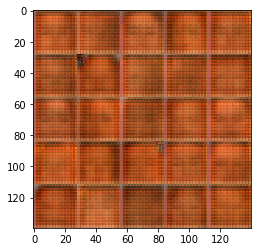

Epoch 1/1... Discriminator Loss: 0.6950... Generator Loss: 1.8306
Epoch 1/1... Discriminator Loss: 0.5172... Generator Loss: 1.5824
Epoch 1/1... Discriminator Loss: 0.8734... Generator Loss: 0.9097
Epoch 1/1... Discriminator Loss: 0.8373... Generator Loss: 1.4062
Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 1.3967
Epoch 1/1... Discriminator Loss: 1.0413... Generator Loss: 1.3934
Epoch 1/1... Discriminator Loss: 0.6956... Generator Loss: 1.3479
Epoch 1/1... Discriminator Loss: 0.6965... Generator Loss: 1.4701
Epoch 1/1... Discriminator Loss: 0.8649... Generator Loss: 1.8347
Epoch 1/1... Discriminator Loss: 0.8511... Generator Loss: 2.0333


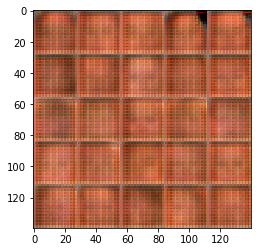

Epoch 1/1... Discriminator Loss: 0.7843... Generator Loss: 1.3688
Epoch 1/1... Discriminator Loss: 0.8072... Generator Loss: 1.0244
Epoch 1/1... Discriminator Loss: 1.0034... Generator Loss: 0.8559
Epoch 1/1... Discriminator Loss: 0.8582... Generator Loss: 1.3345
Epoch 1/1... Discriminator Loss: 1.9648... Generator Loss: 0.2207
Epoch 1/1... Discriminator Loss: 0.7102... Generator Loss: 0.9203
Epoch 1/1... Discriminator Loss: 1.5199... Generator Loss: 0.4761
Epoch 1/1... Discriminator Loss: 1.4280... Generator Loss: 0.4601
Epoch 1/1... Discriminator Loss: 1.2780... Generator Loss: 0.5118
Epoch 1/1... Discriminator Loss: 0.6719... Generator Loss: 1.2363


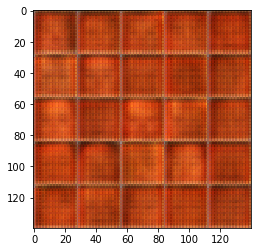

Epoch 1/1... Discriminator Loss: 0.9396... Generator Loss: 0.8252
Epoch 1/1... Discriminator Loss: 0.7302... Generator Loss: 1.6954
Epoch 1/1... Discriminator Loss: 0.6303... Generator Loss: 1.1212
Epoch 1/1... Discriminator Loss: 0.8305... Generator Loss: 1.9488
Epoch 1/1... Discriminator Loss: 0.7493... Generator Loss: 1.6066
Epoch 1/1... Discriminator Loss: 0.8604... Generator Loss: 1.4842
Epoch 1/1... Discriminator Loss: 0.7574... Generator Loss: 1.0757
Epoch 1/1... Discriminator Loss: 1.1250... Generator Loss: 0.7268
Epoch 1/1... Discriminator Loss: 0.6011... Generator Loss: 1.7401
Epoch 1/1... Discriminator Loss: 0.5783... Generator Loss: 2.2162


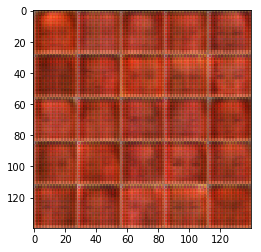

Epoch 1/1... Discriminator Loss: 0.9157... Generator Loss: 0.8770
Epoch 1/1... Discriminator Loss: 0.7276... Generator Loss: 2.2751
Epoch 1/1... Discriminator Loss: 0.7344... Generator Loss: 1.0527
Epoch 1/1... Discriminator Loss: 0.8409... Generator Loss: 0.8692
Epoch 1/1... Discriminator Loss: 0.7650... Generator Loss: 0.9642
Epoch 1/1... Discriminator Loss: 2.4444... Generator Loss: 3.6730
Epoch 1/1... Discriminator Loss: 0.9035... Generator Loss: 1.1001
Epoch 1/1... Discriminator Loss: 0.8399... Generator Loss: 1.0697
Epoch 1/1... Discriminator Loss: 0.9040... Generator Loss: 0.8061
Epoch 1/1... Discriminator Loss: 0.7247... Generator Loss: 1.5271


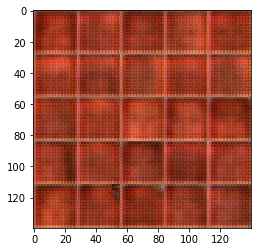

Epoch 1/1... Discriminator Loss: 0.7494... Generator Loss: 1.4957
Epoch 1/1... Discriminator Loss: 1.0452... Generator Loss: 1.0844
Epoch 1/1... Discriminator Loss: 1.0465... Generator Loss: 0.7852
Epoch 1/1... Discriminator Loss: 1.0543... Generator Loss: 0.8494
Epoch 1/1... Discriminator Loss: 1.0169... Generator Loss: 1.9478
Epoch 1/1... Discriminator Loss: 1.2301... Generator Loss: 0.5413
Epoch 1/1... Discriminator Loss: 0.6283... Generator Loss: 1.1523
Epoch 1/1... Discriminator Loss: 0.8791... Generator Loss: 1.1026
Epoch 1/1... Discriminator Loss: 0.6606... Generator Loss: 1.3312
Epoch 1/1... Discriminator Loss: 0.9764... Generator Loss: 1.2630


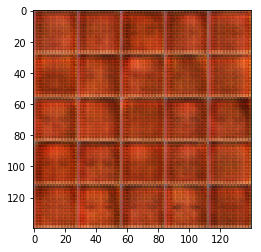

Epoch 1/1... Discriminator Loss: 0.9061... Generator Loss: 0.8145
Epoch 1/1... Discriminator Loss: 0.8623... Generator Loss: 0.9541
Epoch 1/1... Discriminator Loss: 0.6666... Generator Loss: 1.8094
Epoch 1/1... Discriminator Loss: 0.9242... Generator Loss: 1.2303
Epoch 1/1... Discriminator Loss: 0.8592... Generator Loss: 0.8887
Epoch 1/1... Discriminator Loss: 0.8379... Generator Loss: 1.3585
Epoch 1/1... Discriminator Loss: 1.2521... Generator Loss: 0.5635
Epoch 1/1... Discriminator Loss: 0.7719... Generator Loss: 1.2065
Epoch 1/1... Discriminator Loss: 1.6226... Generator Loss: 0.3697
Epoch 1/1... Discriminator Loss: 1.0126... Generator Loss: 0.8293


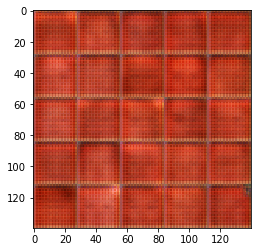

Epoch 1/1... Discriminator Loss: 0.8116... Generator Loss: 0.8944
Epoch 1/1... Discriminator Loss: 0.9207... Generator Loss: 1.1081
Epoch 1/1... Discriminator Loss: 0.6127... Generator Loss: 1.4446


In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.